In [1]:
import pandas as pd
import nltk as nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords

import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

#!pip install TextBlob
from textblob import TextBlob

#For Plotting
import matplotlib.pyplot as plt
import seaborn.apionly as sns

/home/rajan/anaconda3/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [2]:
from pandas import ExcelWriter
from pandas import ExcelFile
 
df = pd.read_excel('/media/rajan/Data/EBAC/9 Text MIning/Assignment/Processed_text.xlsx')

print("Column headings:")
print(df.columns)

Column headings:
Index(['index', 'category', 'title', 'author', 'date', 'read_time', 'shares',
       'Viral', 'content', 'Unprocessed_text', 'Concepts_count', 'imageCount',
       'Day'],
      dtype='object')


In [3]:
type(df['title'])

pandas.core.series.Series

In [4]:
df.head()

index    category                                              title  \
0      0  technology         From Clockworks to Computers on Our Wrists   
1      1  technology               A Modest Privacy Protection Proposal   
2      2  technology  If You Charge People to Tweet, They‚Äôll Revolt ...   
3      3  technology  Why You Shouldn‚Äôt Use Facebook to Log In to Ot...   
4      4  technology                                  Raised by¬†YouTube   

               author       date  read_time  shares  Viral  \
0   Adrian Zumbrunnen 2018-09-20          8    8600      1   
1        Jameson Lopp 2018-09-29         31    3800      0   
2   New York Magazine 2018-10-05         13      58      0   
3       Farhad Manjoo 2018-10-05          4     583      0   
4  Alexis C. Madrigal 2018-10-04         22     497      0   

                                             content  \
0  image courtesy author image courtesy author se...   
1  photo bernard hermant unsplashphoto bernard he...   
2  molly schwartzat midnight july hamza kwehangan...   
3  quit facebook log app site online reasonable w...   
4  chuchu company responsible widely view toddler...   

                                    Unprocessed_text  Concepts_count  \
0  Image courtesy of the author.Image courtesy of...            1984   
1  Photo: Bernard Hermant/UnsplashPhoto: Bernard ...            1942   
2  By Molly SchwartzAt midnight on July 1, Hamza ...            1974   
3  I‚Äôm going to quit using Facebook to log in to ...            1997   
4  ChuChu TV, the company responsible for some of...            2011   

   imageCount         Day  
0           2  5 Thursday  
1           0  7 Saturday  
2           0    6 Friday  
3           0    6 Friday  
4           0  5 Thursday

Feature engineer the count of words in heading

In [5]:
df['count_title'] = df['title'].str.split().str.len()
df['count_content'] = df['Unprocessed_text'].str.split().str.len()

Extract Sentiment using TextBlob

In [6]:
list=[]
list1=[]
i=0
for row in df['title']:
    #print(df['title'][i])
    #print((df['title'][i]))
    blob = TextBlob(str(df['title'][i]))
    list.append(blob.sentiment.polarity)
    list1.append(blob.sentiment.subjectivity)
    i=i+1

In [7]:
se = pd.Series(list)
df['title_sentiment'] = se.values
se = pd.Series(list1)
df['title_sentiment_subjectivity'] = se.values

In [8]:
list=[]
list1=[]
i=0
for row in df['title']:
    blob = TextBlob(str(df['Unprocessed_text'][i]))
    list.append(blob.sentiment.polarity)
    list1.append(blob.sentiment.subjectivity)
    i=i+1

In [9]:
se = pd.Series(list)
df['content_sentiment'] = se.values
se = pd.Series(list1)
df['content_sentiment_subjectivity'] = se.values

In [10]:
df.head()

index    category                                              title  \
0      0  technology         From Clockworks to Computers on Our Wrists   
1      1  technology               A Modest Privacy Protection Proposal   
2      2  technology  If You Charge People to Tweet, They‚Äôll Revolt ...   
3      3  technology  Why You Shouldn‚Äôt Use Facebook to Log In to Ot...   
4      4  technology                                  Raised by¬†YouTube   

               author       date  read_time  shares  Viral  \
0   Adrian Zumbrunnen 2018-09-20          8    8600      1   
1        Jameson Lopp 2018-09-29         31    3800      0   
2   New York Magazine 2018-10-05         13      58      0   
3       Farhad Manjoo 2018-10-05          4     583      0   
4  Alexis C. Madrigal 2018-10-04         22     497      0   

                                             content  \
0  image courtesy author image courtesy author se...   
1  photo bernard hermant unsplashphoto bernard he...   
2  molly schwartzat midnight july hamza kwehangan...   
3  quit facebook log app site online reasonable w...   
4  chuchu company responsible widely view toddler...   

                                    Unprocessed_text  Concepts_count  \
0  Image courtesy of the author.Image courtesy of...            1984   
1  Photo: Bernard Hermant/UnsplashPhoto: Bernard ...            1942   
2  By Molly SchwartzAt midnight on July 1, Hamza ...            1974   
3  I‚Äôm going to quit using Facebook to log in to ...            1997   
4  ChuChu TV, the company responsible for some of...            2011   

   imageCount         Day  count_title  count_content  title_sentiment  \
0           2  5 Thursday          7.0         1767.0            0.000   
1           0  7 Saturday          5.0         5533.0            0.100   
2           0    6 Friday         11.0         3000.0            0.000   
3           0    6 Friday         11.0          914.0           -0.125   
4           0  5 Thursday          3.0         5366.0            0.000   

   title_sentiment_subjectivity  content_sentiment  \
0                         0.000           0.161639   
1                         0.900           0.111469   
2                         0.000           0.076606   
3                         0.375           0.128096   
4                         0.000           0.150359   

   content_sentiment_subjectivity  
0                        0.478840  
1                        0.455275  
2                        0.343302  
3                        0.523070  
4                        0.451837

0    11361
1     1083
Name: Viral, dtype: int64

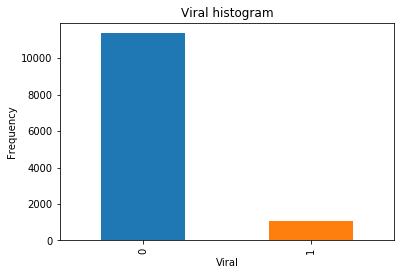

In [12]:
pd.value_counts(df['Viral']).plot.bar()
plt.title('Viral histogram')
plt.xlabel('Viral')
plt.ylabel('Frequency')
df['Viral'].value_counts()

In [13]:
df.groupby('Viral')['shares'].describe()

count          mean           std     min     25%      50%      75%  \
Viral                                                                          
0      11361.0    592.685151    966.649938     1.0    60.0    184.0    603.0   
1       1083.0  16814.829178  22145.086411  5100.0  7000.0  10000.0  17800.0   

            max  
Viral            
0        5000.0  
1      278000.0

In [14]:
df.groupby('Viral')['read_time'].describe()

count      mean       std  min  25%  50%   75%    max
Viral                                                         
0      11361.0  6.963119  4.512517  1.0  4.0  6.0   8.0  101.0
1       1083.0  9.514312  7.293334  2.0  6.0  8.0  11.0   95.0

In [15]:
df.groupby('Viral')['read_time'].max()

Viral
0    101
1     95
Name: read_time, dtype: int64

Count the no of words in the headings


(0, 30)

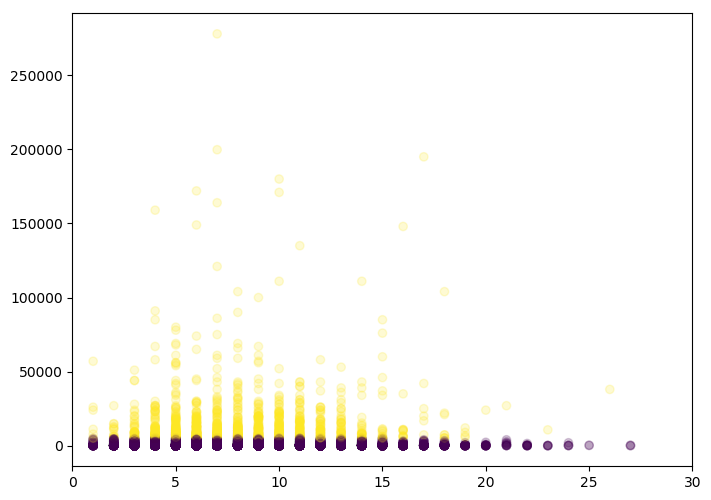

In [16]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')

plt.scatter(df['count_title'], df['shares'], alpha=0.2,
            c=df['Viral'])
plt.xlim(0, 30)

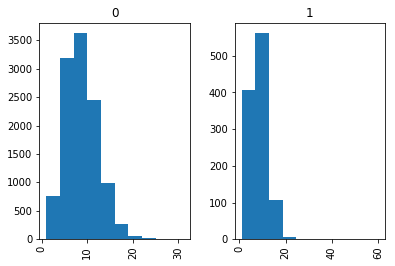

count      mean       std  min  25%  50%   75%   max
Viral                                                        
0      11360.0  8.235123  3.543039  1.0  6.0  8.0  10.0  31.0
1       1083.0  8.114497  3.778258  1.0  6.0  8.0  10.0  60.0

In [17]:

#sns.set() #rescue matplotlib's styles from the early '90s

df.hist(by='Viral',column = 'count_title')
plt.show()
df.groupby('Viral')['count_title'].describe()

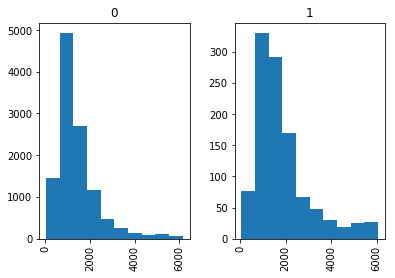

count         mean          std   min      25%     50%     75%  \
Viral                                                                     
0      11360.0  1409.259859   914.259701  41.0   824.00  1163.0  1692.0   
1       1082.0  1854.577634  1193.834750  68.0  1066.25  1507.0  2236.5   

          max  
Viral          
0      6157.0  
1      6062.0

In [18]:
df.hist(by='Viral',column = 'count_content')
plt.show()
df.groupby('Viral')['count_content'].describe()

In [19]:
df.head()

index    category                                              title  \
0      0  technology         From Clockworks to Computers on Our Wrists   
1      1  technology               A Modest Privacy Protection Proposal   
2      2  technology  If You Charge People to Tweet, They‚Äôll Revolt ...   
3      3  technology  Why You Shouldn‚Äôt Use Facebook to Log In to Ot...   
4      4  technology                                  Raised by¬†YouTube   

               author       date  read_time  shares  Viral  \
0   Adrian Zumbrunnen 2018-09-20          8    8600      1   
1        Jameson Lopp 2018-09-29         31    3800      0   
2   New York Magazine 2018-10-05         13      58      0   
3       Farhad Manjoo 2018-10-05          4     583      0   
4  Alexis C. Madrigal 2018-10-04         22     497      0   

                                             content  \
0  image courtesy author image courtesy author se...   
1  photo bernard hermant unsplashphoto bernard he...   
2  molly schwartzat midnight july hamza kwehangan...   
3  quit facebook log app site online reasonable w...   
4  chuchu company responsible widely view toddler...   

                                    Unprocessed_text  Concepts_count  \
0  Image courtesy of the author.Image courtesy of...            1984   
1  Photo: Bernard Hermant/UnsplashPhoto: Bernard ...            1942   
2  By Molly SchwartzAt midnight on July 1, Hamza ...            1974   
3  I‚Äôm going to quit using Facebook to log in to ...            1997   
4  ChuChu TV, the company responsible for some of...            2011   

   imageCount         Day  count_title  count_content  title_sentiment  \
0           2  5 Thursday          7.0         1767.0            0.000   
1           0  7 Saturday          5.0         5533.0            0.100   
2           0    6 Friday         11.0         3000.0            0.000   
3           0    6 Friday         11.0          914.0           -0.125   
4           0  5 Thursday          3.0         5366.0            0.000   

   title_sentiment_subjectivity  content_sentiment  \
0                         0.000           0.161639   
1                         0.900           0.111469   
2                         0.000           0.076606   
3                         0.375           0.128096   
4                         0.000           0.150359   

   content_sentiment_subjectivity  
0                        0.478840  
1                        0.455275  
2                        0.343302  
3                        0.523070  
4                        0.451837

Extracting nouns from the text

In [20]:
list_viral=[]
list_non_viral=[]
i=0
viral= pd.DataFrame(df[df['Viral']==1]['Unprocessed_text'])
non_viral= pd.DataFrame(df[df['Viral']==0]['Unprocessed_text'])
#print(viral)

for j in df.iterrows():
    #print(lines)
    #list_viral.append(TextBlob(df['Unprocessed_text'][i]).noun_phrases)
    print(TextBlob(df['Unprocessed_text'][i]).noun_phrases)
    #print(i)
    i=i+1
#print(list_viral)

len(list_viral)
#i=0
#for row in non_viral:
 #   list_non_viral.append(TextBlob(non_viral[i]).noun_phrases)
  #  i=i+1

['image', 'author.image courtesy', 'author.it ‚Äô s', 'switzerland', 'swiss-made', '‚Äô s', '‚Äô s', 'recent phenomenon.the', '‚Äô s wristwatches', 'peter henlein', 'german locksmith', 'nuremberg', 'taschenuhren', 'early gadgets', 'status symbols', 'upper class', 'social elite', 'pocket watches', 'british innovations', 'it.the invention', 'balance spring', 'horizontal escapement', 'britain', 'watches money', 'critical design flaw', 'early watches', 'comfortably.as fashion', 'thinner watches', 'europe', 'new ways', 'slimmer clockworks', 'smartwatch producers', 'swiss master watchmaker', 'abraham-louis breguet', 'modern wristwatch', 'didn ‚Äô t', 'switzerland', 'longines', 'iwc schaffhausen', 'rolex', 'early 20th century', 'world ‚Äô s', 'top watchmakers', 'different', '‚Äô s', 'small size', 'simple words', 'made.', 'made', 'sought-after seals', 'consumer goods.a', 'gallen', 'swiss luxury', 'swiss government ‚Äô s website boasts', '‚Äú ‚Äò', 'made', 'simple label', 'outstanding quality',

['molly schwartzat', 'july', 'hamza kwehangana', 'late dinner', 'kampala', 'uganda', '‚Äô s capital city', 'whatsapp', 'small blue ‚Äú', '‚Äù button.the message', 'uganda', 'whatsapp.the', 'uganda', 'different social media services', 'whatsapp', 'twitter', 'facebook', 'google hangouts', 'uber', 'tinder', 'instagram', 'skype', 'uganda', '‚Äô s president', 'yoweri museveni', 'social media sites', '‚Äú gossip ‚Äù', '‚Äú fake news. ‚Äù', 'tax charges', 'social media use ‚Äî', 'poverty line', 'museveni', 'ugandans', 'social-media', 'luxury item', 'museveni', 'blog post', 'social media tax', 'deter productivity', 'according', 'social media', 'disposable income', 'leisure activities.but', 'museveni', 'track record', 'online content', '‚Äô s', 'november', 'police raid', 'whatsapp', 'december', 'opposition party', 'facebook', 'museveni', 'april', 'makerere', 'facebook', 'president ‚Äú', 'buttocks ‚Äù', 'wife ‚Äú empty-brained. ‚Äù', 'social media', 'hashtag # 1986pictures', 'museveni', '1986.th

['chuchu', 'toddler content', 'youtube', 'cute origin story', 'vinoth chandar', 'ceo', 'youtube', 'hindu', 'indian music producer', 'baby daughter', 'chu chu', 'new audience ‚Äî', 'chu chu‚Äìlike', 'flash', 'animation program', 'short video', 'indian nursery rhyme ‚Äú', 'chubby cheeks.', 'curly', 'fair /', 'eyes', 'teacher', '‚Äô s pet', 'chu chu', 'chandar', 'it. ‚Äù', 'youtube', 'twinkle', 'twinkle', 'little', 'someone', 'youtube', 'chandar', 'content. ‚Äù', 'chandar', 'chennai', 'south indian state', 'tamil nadu', 'it', '‚Äô d run', 'month.five years', 'chuchu', 'traditional competitors', 'sesame', 'disney', 'nickelodeon', 'well-known characters', 'worldwide brand recognition', 'sesame', 'youtube', '‚Äô s', 'chuchu', 'sesame', 'street ‚Äô s', 'main feed', 'chuchu', 'tv channel', 'youtube', 'blade', 'subsidiary channels', 'chuchu', 'surprise eggs', 'chuchu', 'espa√±ol', 'chuchu', 'india', 'month tens', 'u.k.', 'canada', 'mexico', 'australia', 'asia', 'africa', 'roughly', 'earth', 'yo

['jake', '‚Äô s', 'distraction-free', 'jake', '‚Äô t', 'wasn ‚Äô t', 'wasn ‚Äô t', 'don ‚Äô t', 'didn ‚Äô t', 'normal.that ‚Äô s', 'doesn ‚Äô t', '‚Äô s', 'smoke cigarettes', 'public health issue', 'century.today', '‚Äô s', 'jake', '‚Äô s abnormal choice', 'great work', 'side projects.i', 'infinity pools', 'unscientific study', 'distraction-free', 'iphone.three years', 'distraction-free', 'jake', 'dorks', 'january', 'google pixel', 'android.this', 'new opportunity', 'android', 'distraction-free android.first', 'bad news', 'android', 'google account', 'gmail', 'phone.the good news', 'android', 'pixel', 'system app', 'google account', '‚Äô s', 'pretty slick.of course', 'didn ‚Äô t install', 'twitter', 'facebook', 'instagram', '‚Äô m', 'snapchat.i', 'youtube', 'system settings', 'youtube', '‚Äô s', 'infinity pool', 'wall', 'street journal article', 'youtube', '‚Äô s recommendations', 'chrome', 'twitter', 'facebook', 'chrome', '‚Äú pressure-release valve', 'extra step', 'infinity pools.the

['rebecca spaldingit', 'john f. kennedy', 'local legend goes.before fate', 'bostonian', 'u.s.', 'space program', 'cambridge', 'massachusetts', '29-acre site', 'kendall', 'electronics center', 'national aeronautics', 'space administration', 'late 1960s', 'kennedy', 'agency ‚Äô s plans', 'houston', 'problem ‚Äù', 'cambridge', 'disrepair.a half-century', 'expensive business districts', 'u.s.the', 'office space', 'boston', 'command rents', 'priciest pockets', 'manhattan', 'san francisco', 'scientific ambitions', 'kennedy', '‚Äô s', 'great frontier', 'cambridge-area', 'ever-deeper mysteries', 'unprecedented therapies.much', 'kendall', 'academic centers', 'block ‚Äî', 'sixty-two', 'public companies', 'market value', 'biotechnology firms', 'cambridge', 'global', 'pharmaceutical giants', 'takeda pharmaceutical', 'sanofi sa', 'novartis ag', 'extensive research operations', 'city. ‚Äú', 'kendall', 'massachusetts', 'kendall', 'york', 'paris', 'washington', 'jay bradner', 'novartis institutes', 'b

['high quality information', 'world.social media giants', 'facebook', 'twitter', 'google', 'reddit', 'people consume', 'digital society expands', 'immense problems', 'scale.rampant spam', 'fake news', 'inappropriate content', 'information economy today.as companies', 'sinister questions', 'human bias', 'monopolistic behavior.but', 'human curators', 'sophisticated machine learning filters', 'bad actors', 'social media giants.for example', '‚Äô s obnoxious', 'twitter', 'scam bots', 'twitter', '‚Äô s', 'machine learning filters', 'human employees', 'scam bots', '‚Äô s', '‚Äô s', '‚Äô s', 'cognitive leap', 'social media corporation', 'modern nation state', 'billions', 'global citizens', 'corpor-nations maximize', 'user experience', 'terms', 'tos', 'identifiable terms', 'service violations', 'ai', 'machine learning', 'capable.many potential violations', 'quality terms', 'countless violations', 'corporations need', 'enlist thousands', 'human curators', 'horrible videos', 'offensive tweets', 

['mark sullivani', 'july', 'santa clara', 'california', 'mendocino', 'state history', 'firefighters', 'containment lines', 'steep inaccessible areas', 'new challenge‚Äìthe loss', 'internet connection', 'vital command', 'control vehicle', 'broadband connection', 'oes', 'normal speed', 'vital emergency communications.why', 'fire department', 'monthly data allotment', 'verizon', 'essential data', 'county fire', 'new data plan', 'santa clara', 'county fire chief', 'anthony bowden', 'new data plan. ‚Äù', 'verizon', '‚Äô s', 'only solution', 'fire department', 'expensive data plan. ‚Äù ‚Äú', 'net neutrality', 'verizon', 'plan. ‚Äù', 'verizon', 'data caps', 'california', 'emergency response vehicles.meanwhile', 'sacramento', 'state senator', 'scott weiner', 'isps', 'internet service providers', 'weiner', '‚Äô s network neutrality bill', 'sb-822', 'bill assures', 'isps', 'verizon', 'at', 'comcast', 'data packets', 'isps', 'delivery speeds', 'big internet companies', 'great disadvantage', 'inte

['by mike elgana', 'kooky schemes', 'dubious proposals', 'weird hardware', 'excessive smartphone use', 'self-improvement fringe', 'fast', 'anti-distraction movement', 'silicon', 'valley giants', 'special features', 'products less.the issue', 'efforts aim', 'motorola', 'harvard', 'nancy etcoff', '‚Äú phone-life balance. ‚Äù', 'numerous', 'smartphone addiction', '‚Äô d', '‚Äô s', 'phones people', 'crack cocaine', 'smartphone apps‚Äìsocial media', 'smartphones', 'aren ‚Äô t addictive', '‚Äô re', 'powerful enablers.pavlovian notification alerts', 'red ‚Äú messages', '‚Äù icon badges trigger', 'zombie-like compulsion', 'smartphone app rabbit hole', 'cravings.there ‚Äô s', 'real', '‚Äô d', '‚Äô s', 'curb smartphone addiction', 'basic approaches', 'category.last year', 'klemens schillinger', 'substitute phone', '‚Äô s', 'actual smartphone', 'stone beads', 'abacus-like beads', 'row simulates', 'touch screen', 'smartphone.the dubious notion', 'snapchat', 'smartphone addiction', 'dummy device ea

['disruptions', 'food industry', 'kitchensthe food industry', 'value chain', 'multiple stakeholders', 'retail market forces', 'food industry', 'disruptive forces', 'technological innovations.at', 'value chain', 'tech giants', 'trillion-dollar industry', 'new food sources', 'food production', 'meal kits', 'raw ingredients', 'farm-to-table ‚Äù trend', 'local ‚Äù', 'food distribution networks', 'regional focus', 'whereas innovations', 'genetic engineering', 'cultural trend', 'own in-depth analysis', 'staying', 'lab', '‚Äô s', 'brand perspectives', 'food services', 'main touch points', 'food brands', 'customers today.last summer', 'amazon', 'whole', 'shock wave', 'grocery market', 'seattle-based', 'special deals', 'prime', '2-hour delivery', 'select markets', 'echo', 'smart speakers', 'valuable touchpoint', 'upscale grocery shoppers', 'prime', 'valuable distribution points', 'cpg', 'whole', 'amazon', 'private label products', 'ecommerce platform', 'private label products', 'major grocery c

['content strategies', 'tech companies', 'maxime lagreslebefore', 'saas', 'software companies', 'plain old-school ‚Äî', 'aggressive engagement', 'persuasive discussions', 'price war', 'potential buyer', 'product ‚Äô s', 'solutions.don ‚Äô t', '‚Äô s', 'sales team', 'silver bullet', 'company ‚Äô s', 'before-and-after scenario', 'way teams', 'prospect ‚Äô s ‚Äú job story ‚Äù', '‚Äô s', 'different scenario', 'saas', 'core strategy.that', 'whole industry', 'lead generation', 'real reason', 'legendary entrance', 'sales process ‚Äî', 'old sales processes.from', 'big buzzwords', '‚Äú sustainability ‚Äù', '‚Äú education ‚Äù', '‚Äú awareness ‚Äù', 'customers ‚Äù', 'main questions', 'wouldn ‚Äô t', '‚Äô s pause', '‚Äô s head', 'memory lane', 'michelin', 'brothers dreamt', 'michelin guide', 'customer service tool', 'michelin guide', 'authoritative voice', 'french tyre company', 'tyres.while tyres', 'content don ‚Äô t', 'perfect sense', 'road trips', 'michelin guide', '‚Äô s digital world', 'free 

['jekyll', 'well-known static website generator', 'various blogs', 'jekyll', 'amazon web', 'personal blog website', 'jekyll', 'well-known performant', 'scalable platform', 'namely amazon web', 'aws', 'aws', 'perfect platform', 'static website', 'aws', 'don ‚Äô t', 'server costs', 'don ‚Äô t', 'don ‚Äô t pay', '‚Äô t cost', 'aws cloudfront', '‚Äô s edge locations', '‚Äô s', 'content delivery network', 'cdn', 'aws s3', 'object storage service', 'don ‚Äô t', 'server capacity', '‚Äô s', 'ftp', 'aws codepipeline', 'aws codebuild.before', 'aws', 'aws', 'registration', '‚Äô s', 'free tier', '‚Äô re', 'aws.when', 'jekyll', '_config.yml file', 'permalink property', 'jekyll', 'don ‚Äô t', 'url', 'aws s3.i', 'github', 'codebuild', 'codepipeline', 'automatic deployments', 'repository compatible', 'codepipeline', 'github', 'aws s3', 'aws codecommit.awesome', 'aws', 'good stuff', 'basic overview', 'basic understanding', 'cloud infrastructure', 'up.in total', 'aws', 'route53', 'cloudfront', 'simple s

['architecht', 'sept.', 'click', 'full issue', 'new issues', 'interesting thing', 'it', 'week didn ‚Äô t', 'dreamforce', 'microsoft ignite', 'cloudflare', '‚Äô s 8th-anniversary festivities', 'bandwidth', 'essentially', 'egress charges', 'cloudflare', 'cloud provider', 'cloudflare', 'route traffic', 'provider.the members', 'bandwidth', 'automattic', 'backblaze', 'digitalocean', 'dreamhost', 'ibm cloud', 'linode', 'microsoft azure', 'packet', 'scaleway', 'vapor', 'cloud providers', '‚Äô s', 'cloudflare', 'separate agreement', 'google cloud', 'cdn interconnect', 'blog posts', 'architecht', 'cloudflare ceo matthew', 'backblaze ceo gleb budman', 'legitimate attempts', '‚Äô ve', 'facilitate multi-cloud architectures', 'network level', 'low latency', 'technologies', 'kubernetes', 'cloud portability', 'devops', 'data egress fees', 'pure profit', 'cloud providers.the', 'big thing', 'bandwidth', 'new business', '‚Äô t/don ‚Äô t', 'mega cloud-providers', 'whereas', 'hasn ‚Äô t', 'economic sense'

['headphones ‚Äù', 'ralf groene.microsoft', '‚Äô s', 'head', 'industrial design', '28-inch screen', 'surface', 'surface pro', 'manhattan', 'microsoft', '‚Äô s', 'high end audio device', 'microsoft', 'sound card', '‚Äô s', 'microsoft', 'surface', 'new highwater mark', 'surface pro', 'surface laptop', 'surface', 'solid component-level updates', 'company ‚Äô s', 'windows', 'pc', 'intel', 'cpus', 'surface pro', '‚Äô s', 'surface headphones', 'voice-activation-ready cans', 'microsoft', 'especially', 'groene', 'favorite people', 'microsoft', 'devices head panos panay', 'new products', 'groene', 'surface', 'design details', 'pr', 'groene', '‚Äô s elbow', 'headphones', 'matte silver finish', 'surface dials', 'microsoft windows', 'control puck', 'ear cushions', 'side. ‚Äú', 'didn ‚Äô t design', 'groene.he', 'early', 'surface headphones', 'potential use', 'skype', 'communication device', 'physical microphone boom', 'office worker', 'groene', 'far-field microphones', 'elegant voice activation com

['tesla model', 'message boards', 'facebook', '‚Äô d share', 'early experiences', '‚Äô ve', 'initial report.on', 'march', 'tesla', 'model', 'electric car', 'chevy volt', 'plug-in hybrid', '‚Äô d', 'april', 'june', 'tesla', 'web site', 'fremont', 'ca', 'base-model wasn ‚Äô t', 'option packages', 'hadn ‚Äô t', 'performance', 'performance', 'extra performance package', 'yeah', 'price tag', 'base price', 'gulp‚Ä¶much', 'elon musk', '‚Äô s production hell', 'delivery logistics hell', 'personal experience', 'june', 'august', 'upbeat email', 'delivery advisor', 'well', 'quick phone', 'delivery date', 'august', '4:30pm window', 'didn ‚Äô t', 'didn ‚Äô t email', 'didn ‚Äô t', 'delivery advisor', 'didn ‚Äô t', 'hadn ‚Äô t', 'arizona', 'california', '‚Äô d', 'fremont delivery', 'delivery center', 'long story', 'two-and-a-half hours', 'luckily', 'car ‚Äô s', 'vehicle identification number', 'vin', '‚Äô d', 'salesforce.com', 'computer system.everyone', 'message boards', 'assembly defects', 'paint i

['smart agriculture', 'livestock management', 'iot', 'worksit ‚Äô s', 'internet', 'iot', 'various industries', 'business operations', 'different aspects', 'human resources', 'hard machinery', 'technological solutions', 'core operations', 'iot', 'whole sphere', 'main directions', 'internet', 'iot', 'significant impact.iot', 'widespread directionas', 'popular dimensions', 'iot', 'special attention', 'smart technology', 'autonomous vehicles', 'iot', 'friendly pesticides', 'smart technology', 'natural factors', 'soil composition', 'weather forecast.in', 'iot', 'firstly', 'cropmetrics', 'vri', 'rate irrigation', 'soil variability', 'maximize efficiency', 'yield performance', 'iot', 'precision data specialist', 'introduces simple-to-use cloud software', 'high level', 'optimizes irrigation scheduling', 'semios', 'analytics platform', 'unique opportunity', 'plant information', 'iot', 'semios', 'scalable platform', 'yield improvement', 'real-time updates', 'health condition', 'iot', 'smart agri

['martin gilesa', 'general assembly meeting', 'york', 'nuclear arms control', 'wasn ‚Äô t', 'cyber weapons.in', 'government experts', 'international law', 'voluntary norms', 'states ‚Äô behavior online', 'countries shouldn ‚Äô t target', '‚Äô s', 'critical infrastructure', 'territory.the un initiative', 'hasn ‚Äô t', 'revelations', 'russian', 'us power companies', 'us electoral system', 'chinese efforts', 'intellectual property', 'norms haven ‚Äô t', 'uk', 'aggressive response', 'digital provocations.the us', 'new national cyber strategy', 'offensive operations', 'lengthy approval processes', 'uk', '2,000-person team', 'tech experts', 'launch cyberattacks.the', 'new us strategy', 'international ‚Äú cyber deterrence initiative ‚Äù', 'america', 'malicious cyberattacks', 'economic sanctions', '‚Äô s', 'recalcitrant countries', '‚Äô s', '‚Äô s', 'arms control', 'james lewis', 'studies', '‚Äô s', 'cyber hostilities', 'short term', 'aggressive attacks', 'public services', 'electrical grids',

['photo', 'hal gatewood', 'unsplashphoto', 'hal gatewood', 'unsplashin december', 'facebook', 'messenger', 'young people facilitate relationships', 'child ‚Äô s friends', 'social media', 'adverse effect', 'facebook', 'child health experts', 'app undermines healthy development', 'elementary school-age kids', 'aren ‚Äô t', 'online relationships.the', 'messenger kids', 'mental health experts', 'company executives', 'safety ‚Äî', 'responsibilities companies', 'popular', 'social media sites', 'facebook', 'twitter', 'instagram', 'facebook', 'young people.the problem', 'technology ‚Äî', 'social media', 'general screen time ‚Äî affects youth development', 'public outcry', 'internet use changes kids ‚Äô brains', 'internet addiction', 'mental illness', 'psychiatric', 'disorder.some studies', 'social media', 'poor body image', 'september', 'lancet child', 'adolescent', 'kids ‚Äô screen time', 'technology hurts children', 'wrong question ‚Äî', 'it. ‚Äú', 'social media companies', '‚Äô re', 'robert

['job', 'creators ‚Äî', 'forum', '‚Äô ll', 'new ones ‚Äî', 'net gain', 'worth', 'business execs', 'washington post', 'tech ‚Äî', 'journalists julia angwin', 'jeff larson', 'news organisation', 'markup', 'investigative tech stories', 'propublica', 'ai', 'techcrunch', 'listen', 'angwin', 'recode', '‚Äô s', 'peter kafka.the eu', 'ai', 'plan ‚Äî', 'china', 'ai', 'nicolas berggruen', 'nathan gardels', 'europe', 'ai', 'eu', 'basic science', 'world post', '.report ‚Äî', 'artificial intelligence', 'opportunities', 'risks', 'berkman klein centersupreme', 'court rules', 'aadhaar', 'india', '‚Äô s', 'supreme court', 'aadhaar', 'country ‚Äô s', 'national biometric database', 'express', 'access', 'consent ‚Äî', 'harvard', 'review', 'information science professor', 'helen nissenbaum', 'consent mechanisms', 'poor protection', 'hbr', '‚Äô s', 'september', 'leslie john', 'behavioural science', 'personal data.mi5', 'eye ‚Äî', 'uk', 'uk', '‚Äô s', 'domestic intelligence agency', 'private communications',

['‚Äô re', 'screen', 'help.for years', 'carphone warehouse', 'long process', 'shady tactics', 'hardware manufacturers', 'software engineers', 'addicted', 'carphone warehouse', 'own business', 'wasn ‚Äô t', 'own mind ‚Äî', 'day.i ‚Äô ve', 'various tactics', '‚Äô ve', 'dumb ‚Äô phone', '‚Äô ve', 'content blockers', '‚Äô ve', '‚Äô ve', 'extreme level.throughout', 'long process', 'extensive study', 'social media reform', 'technology criticism¬π', '‚Äô ve', '‚Äô s', 'dumb phone', 'valuable tools', 'public transport apps', 'digital navigation', '‚Äô ve', 'label ‚Äò non-grabby ‚Äô tools', '‚Äî apps', 'attention ‚Äî', 'simple utilities ‚Äô', '‚Äô re', 'problem.the problem isn ‚Äô t', 'smartphone addiction.the problem', '‚Äô s', 'bottomless content', 'empty stimulation', 'dopamine hits', 'social validation whenever', 'platforms', 'facebook', 'reddit', 'twitter', 'medium', 'instagram', 'massive scale', 'arms war gathers pace', 'attention', 'finite resource', 'causes long-term damage.after years'

['ripple ceo', 'brad garlinghouse', 'disrupt sf', 'techcrunch', '‚Äô s', 'mike butcher', 'controversial fintech company', 'masterful interview', 'ripple', 'xrp', 'labs', 'global payments', 'xrp', 'world ‚Äô s', 'market cap', 'securities fraud', 'irate investors', 'recent crash', 'ripple', 'xrp', 'xrp', 'howie test', 'investor expectations', 'xrp', 'sec', '‚Äô m', 'garlinghouse', '‚Äú people', 'ripple', '‚Äô s', '‚Äô re', 'cross border payments', 'ripple', 'xrp', 'transactions. ‚Äù', 'mike arrington', 'founder', 'techcrunch', 'arrington xrp capital', 'xrp', 'fantastic currency', 'have', 'international wire', 'didn ‚Äô t', 'xrp', 'cents. ‚Äù', 'arrington', 'longtime friendship', 'garlinghouse', 'techcrunch', 'aol', 'verizon', 'brad', 'aol', '‚Äô s', 'primary person', '‚Äô s', 'california', 'brad', 'ripple', 'lps', 'large amounts', 'xrp.', 'arrington', 'ripple', 'isn ‚Äô t', 'lp', 'xrp', 'small part', 'garlinghouse', 'forbes', 'crypto billionaires', 'ripple', 'chris larsen', 'jed mccaleb'

['gmail', 'graven type', 'weren ‚Äô t', 'right words', 'didn ‚Äô t', 'matter ‚Äî', 'shitty', 'google', '‚Äô s auto-suggestions', 'digital suggestions', '‚Äô s', 'display ads', 'amazon', '‚Äô s', 'spotify', 'youtube', 'search', '‚Äô s', 'twitter', '‚Äô t', 'glass means', '‚Äô ve', 'decades.it ‚Äô s', 'text messages', 'private spaces', 'online communication', 'apple', '‚Äô ve', 'musicians links', 'in-house products', 'own words.google', 'gmail', 'orange text ‚Äî', '‚Äô s', 'person didn ‚Äô t email', 'hadn ‚Äô t', 'twitter dm', 'irl.the', 'company calls', 'smart compose.', 'smart reply', 'ai', 'appropriate responses', '‚Äù ‚Äú', '‚Äù ‚Äú', '‚Äù ‚Äú', 'have', 'good weekend', 'cutesy bubbles', 'gmail', '‚Äô s nightmare redesign', 'conversation options', 'choose-your-own-adventure video game', 'smart reply', 'magic', 'ball', 'previous language', 'crunched-up text', 'google', 'say', 'dozen meetings', 'bullshit job', 'pointless email ‚Äî', 'opt out.i', 'youtube', 'spotify', 'organic reality', 

['raw materials', 'work-in-progress inventory', 'final product', 'enter', 'so-called stereolithography', 'late 1970s', 'digital printers', 'new product ideas.within', 'automotive industry ‚Äî', '‚Äô s potential', 'technology.beyond prototype design', '3d printers', 'final production', 'certain parts', 'such parts', 'different method', '3d printing.still', 'industrial technology', 'final customer', 'recent years', 'popular science-fiction', 'realistic.the concept', 'mass market', 'logistics ‚Äî', '‚Äô s world.in', 'current state', 'great products', 'am technology', 'future logistics world', 'result.while 3d', 'mainstream technology', '3d printer', 'amazon.depending', 'necessary size', 'desktop printer', 'enthusiastic individuals', 'amazingly', 'years ago.so', 'amazon', 'well', 'private use.in addition', 'equipment costs', 'industrial adaptation', 'private individuals', 'new materials', '‚Äô s', 'broad industrial adaptation first.in', 'recent study', 'stratasys', 'high equipment', 'produ

['site', 'gallery ‚Äô s exhibition', 'liquid', 'displayjussi parikka', 'media theorist', 'professor', 'technological culture', 'aesthetics', 'winchester', 'art', 'southampton', 'docent', 'digital culture theory', 'turku', 'finland', 'parikka', '‚Äô s work', 'media ecology', '‚Äò medianatures ‚Äô', 'recent book', 'geology', 'media', 'material basis', 'rare earth minerals', 'environmental humanities', 'parikka', '‚Äô s comment', 'thomas pynchon', 'own work', '‚Äô crystallises', 'technological culture ‚Äô', 'jeanine griffin', 'phd', 'site', 'sheffield hallam university.jeanine griffin', 'jg', 'your', 'material history', 'media ‚Äî', 'media technologies‚Äì', 'mediatic value', 'telegraphic receivers', 'glass plate photography', '‚Äò archaeologists-cum-geologists ‚Äô', 'contemporary media', 'digital ‚Äô', '‚Äò mineral durations ‚Äô', 'jussi parikka', 'jp', 'doesn ‚Äô t', 'historical contexts', 'material things ‚Äî', 'media ‚Äî', 'digital ‚Äî', 'broad technicalities', 'media culture', 'techno

['n.b.in', 'british empire', 'ireland', 'old rules', 'w.b.yeats', '‚Äú things fall', 'hold. ‚Äù', 'post-war institutions', 'technological innovation', 'rules. ‚Äú', 'power', 'carl miller', 'new cages', 'power. ‚Äù', 'mr miller', 'research director', 'online technology', 'demos', 'british think-tank', 'death', 'global power grab.', 'social media', 'new groups', 'new ways', 'dominant players.we', 'mr miller', 'below', 'economist', '‚Äô ve', 'ways technology', '‚Äô s', '‚Äô s', 'carl miller', '‚Äô re', 'law enforcement crisis', 'hackers', 'law ‚Äî', 'new power elite', 'professional media', 'civic journalists', 'huge stories', 'software', 'anti-monopoly laws', 'cages ‚Äî regulation', 'professional standards', 'public scrutiny ‚Äî', 'power', 'economist', 'mr miller', 'new cages', 'royal society', 'technologists', 'ethics-by-design', 'digital', 'major digital literacy programme', 'whole fabric', 'laws needs', 'new laws', 'way power', 'economist', 'social media', 'digital media', 'mr miller',

['jessi hempelin august', 'mark zuckerberg', 'white paper', 'facebook', 'tech industry', 'facebook', 'people online', 'everyone', 'free basic internet service', 'zuckerberg', 'data', 'universal', 'basic internet service', 'isn ‚Äô t', 'itself. ‚Äù', 'wiring', 'powerful players ‚Äî institutions', 'facebook', 'times cheaper.zuckerberg', 'audacious proposal', 'social software company', 'zuckerberg', 'significant failure', '‚Äô d', 'harvard', 'immense responsibility', 'outsize success', 'facebook', 'internet.org', 'launched', 'strike business deals', 'phone carriers', 'small number', 'stripped-down web services', 'facebook', 'web ‚Äô s', 'world ‚Äô s population ‚Äî', 'zuckerberg', 'drones.the work', 'humanitarian effort', '‚Äú dot-org', 'suffix nonprofits', 'do-gooder status', 'zuckerberg', 'wasn ‚Äô t', 'facebook', '‚Äú serv [', 'moral imperative', 'promotional video', 'john f. kennedy', '‚Äô s voice reading excerpts', 'american university', 'children ‚Äô s future', 'mortal. ‚Äù', 'andrew

['illustration', 'ricky linnillustration', 'ricky linnberkeley', 'californiasimone ewell-szabo', 'dad ‚Äô s', 'grenville', 'santa fe', 'mexico', '‚Äô re', 'area.it', '‚Äô s', '‚Äô s', '‚Äô m', '‚Äô m', 'historically', 'berkeley', '‚Äô re', 'uc', '‚Äô s', 'amazing demonstrations', '‚Äô s', 'berkeley', 'area.yes', 'young woman', 'rights women', 'berkeley', 'amazing health center', 'birth control', 'good sexual education', '‚Äô m', 'gun safety', 'walmart', 'semiautomatic weapon doesn ‚Äô t', 'unarmed people', '‚Äô re brain-dead', '‚Äô s', '‚Äô re', 'passionate generation', 'social media', '‚Äô re', 'okay', '‚Äô re', 'change. ‚Äù', '‚Äô re', 'wrong.the fact', 'unarmed black people', 'correctional officer', 'don ‚Äô t', 'eat.the fact', 'u.s.', 'fifty', '‚Äô t manage it.it', 'way people', 'own reality', '‚Äô re', 'oh', 'god', '‚Äô t pay', 'hard. ‚Äù', '‚Äô s', '‚Äô m', 'jazz musician', 'business school', 'apple', '‚Äô m', 'office space', 'beautiful house', 'kensington hills.but', 'spiritual 

['mark gurman', 'ian kingin', 'sept.', 'upsell isn ‚Äô t', 'wide-stereo speakers', 'dual-lens camera', 'stainless steel accents', '‚Äô s', 'nand', 'storage chip', 'portrait mode.the', 'xs', 'xs max', 'september', '512-gigabyte storage option', 'high-definition movies', '‚Äô s', 'maximum 256gb', 'year ‚Äô s flagship iphone', 'original iphone', 'apple', 'charges customers', 'hasn ‚Äô t', 'higher-capacity options', 'component prices', 'global smartphone industry slowdown', 'iphone prices', 'new digital services', 'selling', 'powerful example', 'storage', 'profitable iphone', 'wayne lam', 'ihs markit ltd', 'adding', 'isn ‚Äô t', 'apple', '‚Äú whereas', 'screen size', 'phone. ‚Äù', '‚Äô s', 'lam', '‚Äô s rule', 'storage', 'apple', 'company charges customers', 'maximum available amount', '‚Äô s', 'gold mine', 'apple', 'extra $', '64gb minimum', 'new 512gb option', 'data', 'bloomberg', 'software work', 'storage option', 'storage tier', 'year ‚Äô s models', '512gb option', 'apple', '64gb model

['sarah frierwhile', 'instagram', '‚Äô s', 'kevin systrom', 'small ways', 'facebook', 'parent company', 'instagram', 'main social network', 'facebook', 'instagram', 'facebook', 'facebook', 'instagram', '‚Äô s functions', 'app ‚Äô s', 'own staff', 'july', 'ceo mark zuckerberg', 'instagram', '‚Äô s success', 'company ‚Äô s earnings call.systrom', 'mike krieger', 'instagram', 'facebook', 'own vision', 'app ‚Äî', 'zuckerberg', '‚Äô s ideas', 'lately facebook', 'product integrations', 'overall company', 'internal dynamics', 'systrom', 'krieger', 'social media', 'facebook', 'news. ‚Äú building', 'new things', 'world needs', 'systrom', 'zuckerberg', 'extraordinary companies', 'next. ‚Äù', 'plural ‚Äî ‚Äú companies ‚Äù ‚Äî', 'krieger', 'instagram', 'likely start', 'separate entity', 'founders ‚Äô exit', 'zuckerberg', '‚Äú family', 'facebook', 'whatsapp', 'instagram', 'messenger.instagram', 'product goals', 'facebook', 'founder-level authority', 'zuckerberg', '‚Äô s ideas', 'discrete vision', '

['imagine', 'passionate millennials', 'small talk', '‚Äô re', '‚Äô re', 'whole thing.that ‚Äô s', 'first-real job', 'english', 'prestigious law schools', 'prominent tech policy organizations', 'oh', 'american visit', 'low ceilings', 'start-up lawyer friends', 'pretty darn', 'home country', 'dreams', 'local law firm', 'states.well', 'linkedin', 'glorious life', 'true purpose', '‚Äô s', 'little thing', 'h1b', '‚Äô re', 'foreign workers need', 'harvard', 'sorry prestige', 'bitter gravity', 'h1b', 'april', 'high chance', 'hands empty', 'precious company', 'hmm‚Ä¶', '‚Äô d', 'small company', 'big companies sponsor thousands', 'tech workers', 'us engineers', 'high us market rates', 'home country rates', '‚Äô ve', 'small companies', 'experiences differ', 'online applications', '‚Äò yes ‚Äô', 'question ‚Äú', 'will', 'wait', 'route. ‚Äù', 'really', 'american candidates', 'eyes emoji', 'funniest part', 'h1b', 'contractor jobs', 'legal threats', 'us tech companies', 'panic attack', 'night.don ‚Äô

['15-year-old daughter', 'recliner reading', 'ouch', 'left. ‚Äú', '‚Äô m', '‚Äù ‚Äú', 'bit. ‚Äù', '‚Äô s weird', 'parent began.her eyes', 'convulsing.my daughter', 'medical issues ‚Äî', 'cell phone', 'long seconds', 'repeat that.i üëè forgot üëè', 'üëè number üëè', 'üëè 911.i don ‚Äô t', '‚Äô ve', '‚Äô s version', 'little rascals', '‚Äô s', 'quick', '‚Äô s', 'part.i ‚Äô ll', 'including', '3-digit phone number', 'emergency services', 'cpr', 'epi-pen', 'almond allergy', 'wasn ‚Äô t', 'heimlich', 'right thing', 'heart attack', 'was', 'brain aneurysm', 'parent ‚Äô s', '‚Äô d', 'emt', 'grand mal seizure', 'blue tinge', 'normal hue.at', 'emt', '‚Äô re', 'out.long story', 'er', 'eeg', 'ct scan', 'ekg', 'pediatric neurologist visit', 'frontal lobe seizures', 'instant generalization', 'left side afterward', 'seizure meds', 'emergency rescue', 'never', 'ever', 'great detail', 'traumatic experiences', 'apple', 'new features', 'doesn ‚Äô t', 'time.i ‚Äô m', '‚Äô t schedule seizures', '‚Äô s',

['stephen hiltnerask', '‚Äô s', '‚Äô s', 'good chance', '‚Äô ll', 'archetypal story', 'real identity', 'online anonymity', 'grifter', 'less-than-scrupulous spouse', 'hey', 'neil', 'beautiful wife', 'entire hacker community', 'addict', '‚Äô s version', 'story involves', 'patent ‚Äî', 'full legal name', 'private information', 'malicious intent', 'patent. ‚Äù', 'nico sell', 'chief executive', 'wickr', 'public figure ‚Äî', 'that. ‚Äù', 'grifter', 'real name', 'neil wyler', 'dead addict', 'real name', 'nico sell', 'legal name', 'august', 'defcon', 'convention ‚Äî', 'world ‚Äô s', 'las vegas.a', 'lion ‚Äô s', 'media attention', 'guccifer', 'shadowy online avatar ‚Äî', 'russian', 'military intelligence officers ‚Äî', 'democratic national committee', 'defcon', 'real names', 'hacker aliases', 'fake beards', 'colorful disguises.but', 'new pressures', 'defcon', 'community ‚Äô s attitudes', 'longtime hackers', 'sell', 'wyler', 'corporate demands', 'public roles', 'high-level cybersecurity experts'

['charlotte gracethrough', 'america', '‚Äô s', 'supreme court', 'trump', '‚Äô s travel ban', 'kennedy', '‚Äô s replacement', 'important antitrust rulings', 'recent years', 'ohio', 'express', 'express', '‚Äù consumers', 'payment methods', 'visa', 'mastercard.the', 'competition policy practitioners', 'distinct groups', 'digital platforms', 'crucial matter.american', 'express', 'processing payments', 'payment methods', 'traditional', 'direct effect', 'anti-competitive behaviour', 'express', '‚Äô s', 'clarence thomas', '‚Äô s judgement', 'positive feedback', 'express', '‚Äô s conduct', 'federal antitrust law.the court', 'express', 'platform ‚Äô', 'distinct groups', 'service increases', 'group increases', 'express', 'vice versa.a platform', 'indirect network', 'platform ‚Äô s optimal', 'structure recognises', 'competition policy', 'broadly.platform industries', 'newspapers', 'digital ones', 'new ones', 'elizabeth warren', 'ted cruz', 'tech titans', 'modern economy.the behaviours', 'search e

['lara seligmanpeople', 'u.s.', 'hollywood', 'cutting-edge technology', 'nuclear sites', 'floppy disks', 'u.s.', 'windows xp', 'f-35', 'stealth fighter jet', 'defense department', 'silicon', 'massive cloud storage unit', 'secret data', 'intelligence agencies', 'companies', 'amazon', 'google', 'risk averse', 'department ‚Äô s', 'byzantine procurement process', 'jeff bezos', 'tim cook', 'defense department ‚Äô s effort', 'cloud project', 'slow progress', 'u.s.', 'military dominance', 'such partnerships work', 'way technological innovation', 'commercial companies', '‚Äô s', 'broader changes', 'china', 'great power.the fact', 'u.s.', 'great technological breakthroughs', '20th century', 'common knowledge', 'advanced', 'projects', 'agency ‚Äî', 'defense department incubator', 'satellite navigation systems', 'military budgets', 'tech companies', 'private sector', 'huge advantage', 'tech firms', 'consumer goods', '‚Äô ve', 'way war', 'defense secretary', 'james mattis', 'tech company', 'theran

['android', '‚Äô s introduction', 'htc', 'up', 'early fall afternoon', 'york', 'google', 'larry page', 'sergey brin', 'android', '‚Äô s daddy', 'andy rubin', '‚Äô d', '‚Äô m', 'didn ‚Äô t', 'android', 'apple', 'iphone 3g', 'blackberry', 'bold', 'windows mobile', 'mobile platform', 'consumer confusion', 'consumer interest', 'nascent app partners', 'development dollars', 'long time', 'apple', '‚Äô s', 'android', 'g1', 'real innovation', 'compass app', 'maps', 'perfect showcase', 'htc', 'google', 'on-screen', 'special actions', 'built-in haptics', 'smart precursors', 'google', 'search button', 'google', 'google', 'os', 'android', 'ios elegance', 'windows mobile', 'over-wrought clutter', 'constant struggle', 'android', 'early example', 'android', 'device generations', 'partner design choices', 'htc-built g1', 'asymmetrical design', '‚Äú chin', 'physical keyboard', 'iphone 3g', 't-mobile sidekick', 'apple', 'android', 'lg', 'samsung', 'android', 'open message', 'main interface', 'own skins'

['nelson leethe', 'hollywood', 'artificial intelligence', 'human population', 'hollywood', 'accurate representations', 'artificial intelligence', 'artificial intelligence', 'term comprises', 'human knowledge ‚Äî', '‚Äú intelligence ‚Äù part ‚Äî', '‚Äú artificially. ‚Äù', 'herbert simon', 'artificial intelligence', 'inherent risks', 'artificial intelligence', 'bold prediction', '‚Äú machines', 'a.i', 'tesla ceo elon musk', '‚Äô s warnings', 'a.i', 'face', 'artificial intelligence', 'human takeover', 'hollywood', 'humans input', 'inherent flaws', 'inhuman characteristics.clickbait titles', 'media ‚Äô s need', 'a.i..', 'nowadays', 'media ‚Äô s sole purpose', 'generate profits', 'general public', 'crucial matters', 'artificial intelligence', 'time bomb', 'july', 'facebook', '‚Äô s', 'artificial intelligence robots shut down after they start talking to each other in their own language.', 'facebook', '‚Äô s', 'artificial intelligence', 'facebook', '‚Äô s', 'original goal', 'toddlers trade to

['natasha singerwhat', 'facebook', '‚Äô s', 'certain job ads', 'google', 'users ‚Äî', 'location history', 'at', 'mobile customers ‚Äô locations', 'data brokers', 'american policymakers', 'such issues', 'default umbrella term', 'senate commerce committee hearing', 'examining safeguards', 'data privacy.', 'scandals ‚Äî', 'russian-sponsored', 'facebook', 'african-americans', 'congress', 'new federal consumer privacy law.at', 'week ‚Äô s hearing', 'legislators plan', 'amazon', 'at', 'google', 'twitter', 'privacy policies', 'congress', 'clear privacy expectations', 'hearing notice.there ‚Äô s', 'surveillance economy', 'companies track', 'hand isn ‚Äô t privacy', 'data exploitation', 'potential deleterious consequences ‚Äî', 'unequal consumer treatment', 'financial fraud', 'identity theft', 'business models revolve', 'consumer-influence techniques', 'privacy policies', 'veganism. ‚Äú', 'congress', 'privacy policies', 'marc rotenberg', 'executive director', 'electronic privacy information', '

['‚Äô re', 'functional search engines online', 'intranet system', 'google-era', '‚Äô s', 'search', 'world ‚Äô s information', 'tectonic upheaval', 'urls', 'hierarchical menus.the result', 'serious re-arrangement.so', 'google', '‚Äô s', 'search', 'hasn ‚Äô t', 'digital workplace', 'search engine', 'hasn ‚Äô t', 'true potential', 'intranet software', 'digital-savvy businesses', '‚Äô re', 'search capabilities', 'important company information', 'need increases', 'good search function.but', '‚Äô s', 'search', 'good intranet search', 'search', 'profound difference', 'employees work', 'intranet functions', 'search', 'search', 'right information', 'interact', 'search capabilities', 'bets', 'intelligent search', 'particular term.we', 'bets', 'effective way', 'bad search experiences', 'intranet administrator', 'search term', 'ninety-day period', 'specific page', 'best bet.best bets', 'easy way', 'intranet ‚Äî', 'feature attracts', 'significant time savings', 'immediate response', 'old habits', '

['will', 'robot', 'your job', 'examining', 'human workers', 'doesn ‚Äô t', 'real life', 'potential damage', 'long time', 'john henry', 'modern times', 'difficult jobs', 'don ‚Äô t', 'recent recession', 'extensive automation', 'eliot', 'massive unemployment', 'eighty percent', 'human employment', 'benedifkfrey', 'osboune', 'potential devastation', 'economy.some people', 'republican', 'perfect sense', 'big business', 'sizable portion', 'big business', 'ending', 'industrial revolution', 'industrial revolution', 'industrial revolution', 'country ‚Äô s population', 'modern age', 'modern day people', 'new technology', 'new jobs.the', 'main barrier', 'technological development', 'natural resources', 'solar power', 'human workforce', 'new mine', 'environmental harm', 'robots communities', 'machine performance tends', 'wide variety', 'great deals', 'automation', 'extensive automation', 'low wage workers', 'free factory', 'providing', 'underdeveloped countries', 'leaves sustenance', 'model t', '

['alana semuelsit', '‚Äô s', 'things online', '‚Äô s', 'ryan cassata', 'cassata', '24-year-old singer-songwriter', 'los angeles', 'amazon', 'didn ‚Äô t', 'fanny pack', 'browse ‚Äî', 'amazon.he', '‚Äô s awake', 'onion chopper', 'himalayan', 'salt lamp', 'pizza pool float', 'doesn ‚Äô t', 'don ‚Äô t', 'perfect storm', 'physical store', 'certain number', '‚Äô re', 'alexa', 'new underwear', '‚Äô s', 'shop ‚Äî', '‚Äô s', 'bank account', 'elizabeth cline', 'overdressed', 'shockingly', 'cheap', 'humans', 'ann-christine duhaime', 'harvard', 'medical school', 'general rule', 'brain tweaks', '‚Äò stuff ‚Äô', 'novelty ‚Äî', 'distant past', 'brain evolution', 'duhaime', 'harvard', 'review', 'online', 'order arrives', 'amazon', 'seattle', 'one-click buying process', 'shipping address', 'credit-card info', 'prime', 'pay $', 'free ‚Äù two-day shipping', 'major retailers', 'free shipping', 'difficult ‚Äî shoppers', 'post office', 'ups', 'fedex', 'hassle isn ‚Äô t', 'recentnpr/marist poll', 'return stu

['ann-marie alc√°ntaraif', '‚Äô re', 'amazon echo', 'google', 'home owner', '‚Äô s', 'o.k.', 'useful tricks', '‚Äô re', 'alexa', '‚Äô ll need', 'alexa skills', 'google', 'home commands', 'google', 'mobile app.both', 'google', 'amazon alexa', '‚Äú routines ‚Äù skill', 'certain tasks', 'amazon echo', 'google', '‚Äô s', 'alexa', 'day ‚Äù', 'hey google', 'good morning. ‚Äù', 'google', 'day ‚Äô s', 'top stories', 'local news', 'favorite music', '‚Äú morning. ‚Äù', 'echo', 'basic options', 'google', 'ready-to-go routines', 'google', 'home app', 'amazon echo', 'custom routines', 'lifesaver ‚Äî', 'echo', 'child ‚Äô s bedroom', 'alexa', 'alexa', 'voice ‚Äî', 'skill necessary.with', 'google', 'google', 'mini', 'similar command', 'hey google', '‚Äô s time', 'go. ‚Äù', '‚Äô re', 'ios user', '‚Äô re', '‚Äô ll', 'google', 'assistant app', 'android', '‚Äô ve', 'good news', 'so-so news', 'amazon echo', 'alexa', 'alexa', 'echo', 'family member', 'echo', 'echo', 'alexa', '‚Äô re', 'alexa', 'messaging', 

['photo', 'unsplashphoto', 'unsplashanyone', 'jones', 'long island', 'york', 'filter people', 'tarmac.there ‚Äô s', 'strange design', 'robert moses', 'powerful urban planner', 'york', 'state park', 'jones', 'knowing', 'private cars', 'poor black neighborhoods', 'moses', 'limit access', 'too', '12-foot buses', 'under.racist bridges aren ‚Äô t', 'inanimate objects', 'clandestine control', 'history', '‚Äô s', '‚Äô s', 'thoughtless omissions.modern inventions', 'scunthorpe', 'england', 'aol', 'new profanity filter', 'chukwuemeka afigbo', 'nigerian', 'automatic hand-soap dispenser', 'soap whenever', 'white friend', 'darker skin', 'mark zuckerberg', 'facebook', 'dorm room', 'harvard', 'invisible pieces', 'modern machine age', 'social media', 'satellite navigation', 'music recommendation systems', 'modern infrastructure', 'algorithms', 'logical steps', 'cake recipe counts', 'normally', 'word ‚Äú algorithm', 'early', 'british supermarket', 'tesco', 'favourites', 'store ‚Äô s loyalty card', 'te

['search', 'engine optimization', 'seo', 'online visibility', 'web page', 'web search engine ‚Äô s unpaid results ‚Äî', 'natural ‚Äù', '‚Äú organic ‚Äù', '‚Äù results', 'search results page', 'search results list', 'search engine ‚Äô s users', 'seo', 'different kinds', 'image search', 'video search', 'academic search', 'news search', 'industry-specific vertical search engines', 'seo', 'local search engine optimization', 'business ‚Äô online presence', 'web pages', 'search engines', 'user enters', 'local search', 'international searches.as', 'internet', 'seo', 'search engines work', 'dictate search engine behavior', 'people search', 'actual search terms', 'search engines', 'search engines', 'optimizing', 'html', 'specific keywords', 'search engines', 'promoting', 'inbound links', 'seo', 'may', 'mobile search', 'desktop search', 'google', 'mobile search', 'future products', 'different approach', 'internet', 'content providers', 'search engines', 'search engines', 'web', 'url', 'various e

['martin gilescalifornia', 'consumer privacy', 'online gadgets.the state ‚Äô s lawmakers', 'california', '‚Äô s governor', 'jerry brown', 'california', 'us state', 'iot', '.it ‚Äô s', 'such legislation', 'barely', 'new report', 'security cameras', 'years.some experts', '‚Äô s', 'serious injuries', 'safety ‚Äô s sake', 'slow innovation', 'things ‚Äù', '.california ‚Äô s legislation', 'january', 'reasonable ‚Äù security', 'device. ‚Äù', 'different default password', 'common default password', 'large number', 'similar devices', 'different devices', 'state laws', 'consumer data', 'iot', 'hasn ‚Äô t', 'iot', 'security.some cybersecurity experts', 'robert graham', 'errata', 'california', 'potential threat', 'smart devices', '[ bill ‚Äô s ] language', 'beau woods', 'atlantic', 'council fellow', 'information security', '‚Äô s', '[ products ]', 'design. ‚Äù', '‚Äô s', 'good reason', 'reasonable defensive measure', 'specific requirement', 'release patches', 'security holes', 'products ‚Äô softwa

['engineering standpoint', 'precision optical sensors', 'design cameras', 'optical elements', 'refraction', 'subsequent light pattern', 'image plane', 'electrical signals', 'interesting topic', 'large portion', '‚Äô m', 'general idea', 'amazing organic optical sensor', 'humans.human sight exists', 'electromagnetic radiation', 'key stimulus', 'human vision', 'electromagnetic', '‚Äô s wavelength', 'entire electromagnetic spectrum', 'radio waves', 'wave types', 'human eye', 'narrow band', 'visible spectrum', '*1 nanometer = billionth', 'total angular size', 'horizontal binocular', 'fov', 'binocular overlap', 'binocular overlap', 'depth cues', 'fov', 'name suggests', 'important consideration', 'distance varies', 'ipd', 'poor eye-lens alignment', 'image distortion', 'mean ipd', '50‚Äì75mm range', 'ipd', 'optical element', 'important consideration', 'corrective lenses', 'eye', 'enabling', 'eye relief', 'optical system.this', 'cerebral cortex', 'depth cues', 'human brain', 'light signals', 'v

['pete souza', 'noted.all photos', 'pete souza', 'pete souza', 'apple', 'visitors', 'apple', 'new iphones', 'impressive photographic capabilities', 'serendipitous.i couldn ‚Äô t fathom', 'wasn ‚Äô t', 'souza', '‚Äô s surfeit photographic skills', 'instagram', 'ronald reagan', 'barack obama.', '‚Äô m', 'pete', 'pete souza', 'souza', 'lyft', 'afternoon sun', 'yes.', 'souza', '‚Äô d', 'apple', 'xs', 'launch event', '‚Äô ll', 'visitors center', 'souza', 'new photographic capabilities', 'apple', 'xs', 'xs max', 'xr.the', 'dual 12-megapixel cameras', 'xs', '12-megapixel cameras', 'wide angle lens', 'f2.4 2x telephoto lens', 'truedepth', 'sensor technologies', 'new image sensors', 'brand-new image signal processor', 'a12 bionic', 'souza', 'portrait mode capabilities', 'background blur effect', 'rear dual camera system', 'didn ‚Äô t', 'f-stop numbers', 'souza', '‚Äô ll use', 'it. ‚Äù', '‚Äô s', 'way things', 'focus. ‚Äù ‚Äú', 'great lenses work', 'apple', 'senior vice president', 'phil schille

['writing', 'georg simmel', 'vast intensive', 'extensive growth', 'intermediate stages', 'real ultimate ends ‚Äô', 'different political times', 'passage echoes', 'technological systems', 'inwards whilst', 'simmel', 'problem modernity', 'focus.few writers', 'gathering forces', 'simmel', 'david frisby', 'modernity ‚Äô', 'simmel', 'city life', 'secret societies', 'early shifts', 'direction things', 'modern life', 'everyday experiences', 'early 1900s', 'meaning', 'whilst feeling', '‚Äô t', 'sensory overload', 'unfathomable information', 'experiential stimuli', 'modernity life', '‚Äò fragmentary character ‚Äô', 'world ‚Äî', 'thoughtful piece', 'jamie bartlett', '‚Äò fake news ‚Äô', 'particular world-view', 'simmel', 'different world', 'final book', 'algorithmic media', 'fragmentary character', 'simmel', 'world making', 'recent years.over', 'massive data infrastructure', 'mobile devices', 'algorithmic processing', 'social media', 'gps', 'late 1980s', 'social theorist', 'donna haraway', 'stro

['september', 'copenhagen', 'techfestival', 'popular leisure district', 'danish capital city ‚Äî', 'meatpacking', 'tech innovators', 'social entrepreneurs', 'day-long workshops', '‚Äò summits ‚Äô', '‚Äò meet-ups ‚Äô', 'dynamic activities', 'international co-creators', 'evening program', 'social meetings', 'interesting insights', 'innovative projects', 'sustainable development', 'makers', 'movement', 'sustainable urban development', 'energy', 'urban agglomeration', 'polish', 'electric engineer', 'renewable energy ‚Äî', 'anna krzy≈ºanowska', 'general questions', 'lively discussion', 'urban sprawl', 'solutions', 'public transportation', '‚Äô s', 'copenhagen', 'sustainable energy sources', 'city spaces', 'interesting micro-level energy generation prototypes', 'london', 'harnesses energy', 'fresh ideas', 'open talk', 'greenhouse', 'stage ‚Äô', 'industrial production', 'things ourselves. ‚Äò', 'stuff', 'dynamic keynotes', 'charismatic speakers', 'maker', '‚Äô s', 'movement', 'noura abousteit

['saara tuusa', 'semioticianthe', 'seamless', 'infinite possibilities', 'apple', '‚Äô s design aesthetic', 'sci-fi minimalism', 'futuristic elegance ‚Äî', 'digital code ‚Äî', 'visionary fantasy', 'human progress.the digital code', 'don ‚Äô t control', 'black boxes', 'current big-tech backlash', 'privacy issues', '‚Äú disconnect ‚Äù', 'new visual', 'material language', 'tools shape', 'great power', 'design actions', 'history', 'silicon', 'valley design', 'barry m. katz', 'technical performance', 'human behaviour ‚Äù .we', 'design language', 'positive relationship', 'physical manifestations', 'digital ideas', 'technology ‚Äî', 'design aesthetic', 'cultural zeitgeist', 'cultural need', 'image', 'text', 'roland barthes', 'french cultural philosopher', 'likens design', 'myth ‚Äî', 'cultural truths', 'human meaning', 'cultural meaning', 'philosophy needs', 'cultural structures.when', 'aesthetic qualities', 'social context', 'western world', 'answer.the messianic speech', 'steve jobs', 'iphon

['lisa wood shapiroi', '‚Äô m', '‚Äô s', 'professional life', '‚Äô m dyslexic', 'career ‚Äî writer ‚Äî', '‚Äô ve', 'aptitude test', 'literary ‚Äù career', 'constant companion', 'taboo place', 'personal narrative', '‚Äô s', '‚Äô ve outgrown', 'didn ‚Äô t', '‚Äô ve', '‚Äô ve', '‚Äô ve', 'technological wonders', 'microsoft', 'word spell-checks', 'dyslexic mind mangles', '‚Äô s', '‚Äô ll deploy', 'easy synonym', 'search engine', 'query.these ‚Äú cheats ‚Äù', 'familiar routines', 'ai-powered', 'browser plug-in', 'linguistic missteps', 'post-dyslexic world.when', 'words ‚Äî', 'actual orthography ‚Äî', 'word ‚Äú dog', '‚Äô s', 'knowing', 'specific letters', 'wasn ‚Äô t part', 'thinking', 'thought.my dyslexia', 'grade school', 'obvious signs', 'intensive summer school program', 'slide projector-like device', 'controlled reader', 'stuffy room', 'electrical fire.the', 'controlled reader', 'regular slide projector', 'narrow horizontal slit', 'normal kid stuff ‚Äî', 'morning swim time', 'summer ca

['nir', '‚Äô s', '15five.com blog', '‚Äô ve', '‚Äô ve', 'pok√©mon go', 'nir eyal', 'broader context', 'knee jerk reaction', 'new technology', 'don ‚Äô t', 'new technologies.when', 'pok√©mon', '‚Äô s', 'pok√©mon', 'mainstream fitness apps', 'wide appeal', '‚Äô t play', 'clash', 'clans', 'candy crush', 'all-out addiction', 'pok√©mon', 'just lack', 'habits', 'persistent compulsive dependency', 'popular technology', '‚Äô t', '‚Äô s', 'pok√©mon go', 'doesn ‚Äô t', '‚Äô s', '‚Äô t', 'different ethical question.the good news', 'addiction', 'addictive product', 'distillers', 'alcohol don ‚Äô t', 'end users', '‚Äô s', 'facebook', 'instagram', 'pok√©mon go', 'small number', 'small percentage', 'ethical responsibility', 'increase awareness', '‚Äú addictive product', 'pokemon', 'facebook', 'vast majority', 'ethical question', 'social media', 'outright addiction', 'negative impacts', 'mental health', 'couldn', '‚Äô t', 'google', 'facebook', 'twitter', 'inevitable tech-burnout', 'revenue stream', '‚

['‚Äô s', 'elegant smart', '‚Äô s', 'black void', '‚Äô s', 'unavoidable battery', 'svelte metallic frame.as', 'watch collector', '‚Äô m', 'apple watch', 'samsung', '‚Äô s thick', 'galaxy watch', '‚Äô m', 'apple', 'apple', 'fashion object', 'band accessories', 'apple watch', 'apple', '‚Äô s', 'design limits', 'apple watch', 'full-scale redesign', 'apple watch', '‚Äô s', 'elegant direction', 'apple', 'apple watch', 'noticeable changes', 'mm series', 'mm series', 'body accommodates', 'amoled', 'touchscreen screen', 'sapphire glass', 'apple watch', 'apple watch', 'mm series 3.by', 'size differences', 'apple watch', 'previous series', 'bravo', 'apple.apple', 'ample use', 'extra screen real-estate', 'new complications', 'disparate apps', 'overall calendar', 'sunrise-to-sunset-visual tracker', 'uv', 'quick access', 'activity rings', '‚Äô m', 'activity guy', 'workout guy', 'doesn ‚Äô t', 'apple watch', 'attractive new faces', 'excellent use', 'new screen size.all', '‚Äô s', 'distinct increase'

['savage', 'thomas cole', '‚Äô s series ‚Äú', 'empire ‚Äù', 'york historical society/getty images', 'savage', 'thomas cole', '‚Äô s series ‚Äú', 'empire ‚Äù', 'york historical society/getty images/n√¥rmƒì/nounnoun', 'plural noun', 'normiestwo decades', 'gravitational pull', 'so-called ‚Äú', 'inescapable pull', 'universe ‚Äô s expansion', 'astrophysicists', 'force ‚Äú', 'dark energy. ‚Äù', 'dark', 'black hole', 'whereas', 'massive gravitational pull', 'black hole drags', 'dark energy', 'dark energy', 'physical matter', 'physical matter', 'dark energy', 'percent.this discovery', 'electronics companies', 'wifi', 'wireless internet', 'massive step', 'worldwide connectivity.there', 'monumental discovery', 'universe ‚Äô s', 'mass polarization', 'real world', 'virtual world', '‚Äô s', '‚Äô s', 'small groups', '‚Äô ve', 'stable relationships', '‚Äô ve', 'early groups', 'common knowledge', 'wasn ‚Äô t', 'expulsion.since expulsion', 'certain death', 'didn ‚Äô t', 'didn ‚Äô t procreate', 'aren ‚Ä

['katharine schwab', 'alexa', '‚Äô s', 'simple question', 'minimal effort', 'amazon echo', 'vast system', 'natural resources', 'human labor', 'silicon', 'valley ‚Äô s impact', 'tangible harm', 'simple user experiences.it ‚Äô s', 'ai', 'new map', 'ai', 'kate crawford', 'data visualization specialist', 'vladan joler', 'anatomy', 'ai', 'corresponding essay', 'amazon echo', 'human workers', 'rare earth materials', 'black box', 'amazon web', 'submarine internet cables', 'alexa', 'pieces spring', 'innocent questions', 'global economic order', 'earth', '‚Äô s', 'understand. ‚Äú', 'ai', 'joler', 'fast', 'complexity. ‚Äù', 'joler', 'crawford', 'mozilla', 'entire system', 'undergirds voice assistants', '‚Äô s', 'industrial design', 'echo', 'competitors. ‚Äú', 'mineral extraction', 'fiber optic cables', 'ai', '‚Äô s', 'impossible task', 'crawford', 'multiple version', 'butcher ‚Äô s paper', 'sheets. ‚Äù', 'joler', 'crawford', 'echo', '‚Äô s', 'human labor', 'don ‚Äô t', 'voice assistant', 'anthro

['photo', 'lance ulanoffphoto', 'lance ulanoffclose', '‚Äú s ‚Äù year', 'apple', 'released', '‚Äô s', 'apple', 'brand-new successor', 'xs', 'glass backs', 'dual lens camera bumps', 'couldn ‚Äô t', '‚Äô s', 's model years', 'apple', 'iphone design', 'internal components', '5.8-inch iphone', 'xs', 'big brother', '6.5-inch iphone', 'xs max', 'a12 bionic cpu', 'new cameras', 'isp', 'a12', 'final version', 'test units', '.the result', 'iphone aficionados', 'android', 'original iphone', 'oled', 'xs', 'inches x', 'inches x', 'xs', 'original iphone', 'x.it', 'rigid surgical steel frame', 'new glass material', 'apple', 'thin-pile carpet', 'wasn ‚Äô t', '‚Äô ve', 'fine scratch', 'xs max', '‚Äô s', 'xs max', '‚Äô s material', 'design attributes', '6.2-inch x 3.05-inch x 0.30-inch body', '‚Äô s', 'xs', 'xs max', 'hair shorter', '‚Äô s', 'big-screen phone', 'xs max', 'resembles.button placement ‚Äî power/sleep', 'ring/silent switch ‚Äî', 'minor chassis difference', 'bottom edge', 'phones sits', '‚Ä

['frequent flier', 'busy airports', 'interesting strangers', 'certain number', 'ultimate form', 'escape.hopper flights', 'san diego', 'san francisco', 'sometimes-tedious security line', 'laser-style frisk', 'unpredictable delay', 'aisle seat', 'free apple juice', 'short', 'equal happy times', 'international flight‚Ä¶', 'that', 'different story.there', 'unusual punishment', 'add', 'especially', '‚Äú lie flat ‚Äù', 'class seat', 'particular journey', 'middle seat', 'ten-hour flight', 'severe case', 'amazing use', 'virtual reality.i', 'oculus', 'vr', 'business partner', 'potential clients', 'opportune time.it', 'ideal scenario', 'current anxious situation', 'colorado', 'virtual reality', '‚Äù content', 'oculus', 'vr', 'travel vr', 'vr', 'worldwide destinations', 'tourism industry', 'sunset sky', 'virtual friends', 'below', 'large ski goggles', 'unusual sight', 'anything', 'godsend', 'ipad screen', 'travel vr', 'oculus', 'vr', 'headsets catch', 'ten-hour flights', 'europe', 'different worl

['‚Äô s', 'current top-of-the-line model', '512gb variety', 'xs max', '‚Äô s', 'sales tax', '‚Äô s', '‚Äî $ 1,572.17', 'insanely', 'apple', '‚Äô s parlance', '‚Äô s', 'top-of-the-line version', '$ 599.¬π', 'at', 'carrier offering', 'steve ballmer', '‚Äú $', 'fully', 'everyone', 'myself', 'apple', 'holidays ‚Äù ‚Äî $', '$ 399.¬≥with', 'apple', 'iphone 3g', 'apple', 'highest-end model', '16gb version', 'original iphone', 'apple', 'carrier subsidy model.‚Å¥so', 'cheapest iphone', 'new model', 'apple', 'previous year ‚Äô s model', 'right direction‚Ä¶ technology', 'hold', 'apple', 'two-generations-old models', 'top-of-the-line device', 'previously', 'highest-end device', 'iphone 4s', 'apple', 'new 64gb model', '$ 399. $', 'high watermark', '128gb iphone', 'price point', 'carrier subsidies', 'apple', 'high-end iphone 6s', 'year.the ‚Äú cheapest ‚Äù iphone', 'expensive version', '‚Äî $', 'top-of-the-line iphone', 'year before.which', 'apple', '‚Äù test', '512gb model', 'xs max', '‚Äî $', 'yea

['innovative ways', 'educational opportunities', 'stem', 'rocket scientists', 'earth', 'zero-g orbit', 'expensive pieces', 'enormous sums', '‚Äô ve', 'large rockets', '‚Äô s', 'viable alternative', 'space elevators', 'aren ‚Äô t elevators', 'conventional sense', 'ses', 'railroads.an se', 'gigantic tether cable', 'earth', 'space station', 'vice versa', 'geostationary orbit', 'earth', '‚Äô s spin', 'centrifugal force', 'elevator', '‚Äú cars ‚Äù', '‚Äô ll', 'electrical power', 'orbit.the advantages', 'ses', 'traditional rocketry', 'ses', 'ses', 'rocket travel', 'journey skyward', 'wouldn ‚Äô t', 'high-g forces', 'wreak havoc', 'inorganic cargo', 'cargo capacity', 'manage.the origins', 'se idea', 'russian rocket scientist', 'konstantin tsiolkovsky', 'alongside goddard', 'oberth', 'tsiolkovsky', 'rocket science', 'tsiolkovsky', '‚Äô s proposal', 'outer space', 'modern idea', 'space elevator', 'yuri artsutanov', 'russian scientist', '‚Äú tensile structure ‚Äù', 'centrifugal force.aside', 'sh

['social media', '2-year hiatus', 'twitter chats', 'pure. ‚Äù', 'well', 'cell phones', 'child ‚Äù', '‚Äô s', '‚Äô t', 'hmm.let', '‚Äô m', 'don ‚Äô t', 'seriously', 'don ‚Äô t', 'don ‚Äô t', 'don ‚Äô t', 'don ‚Äô t sleep', '‚Äô ve', 'goodnight streaks', 'snapchat', 'blog posts', 'don ‚Äô t', '‚Äô m', 'snapchat', 'google translate', 'educational background involves', 'esl', 'high school seniors', 'sife', 'formal education', 'full time', 'cell phones', 'cell phone policy', 'desktop computer', 'smartboard', 'wasn ‚Äô t', 'budgetary issue', 'availability issue', 'common languages ‚Äî', 'maybe', 'small glossary', 'incidence languages.if', 'esl', '30+ languages', 'english', '< >', 'uzbek', 'latin alphabet ‚Äî', 'cyrillic', 'uzbek', 'cyrillic', 'uzbekistan', 'good luck', 'tajik', 'fulani', 'phrasebook ‚Äî', 'basic words.then', 'common languages', 'urdu', 'haitian creole', 'good luck', 'words kids encounter', '‚Äô s', 'desktop computer', 'google translate', 'smartboard', '20+ times', 'new alpha

['michael grothauswhen', 'apple', 'macbook', 'apple', '‚Äô s', 'apple', 'apple', '‚Äô s products', 'smartphone processors', 'industrial design', 'similar qualities', 'apple', '‚Äô s', 'macbooks', '‚Äô ll pay', '‚Äô ll', 'pc', 'laptop. ‚Äù', 'apple', 'xs', 'xs max', 'xr', 'apple', 'social media', 'new iphones', 'apple', '‚Äô s', 'products ever.yet', 'true statement', 'apple', 'flagship smartphone', 'apple', 'apple', 'devices‚Äìis privacy.in', 'user privacy‚Äìor', '‚Äô re', 'private industry', 'unprecedented scale', 'major corporations', 'teen ‚Äô s father', 'future actions', 'haven ‚Äô t', 'tech giants', 'commercial surveillance state.well', 'apple', '‚Äô s products.apple ‚Äô s devices', 'company ‚Äô s ethos‚Äìare', 'user privacy protections', 'tech companies', 'isn ‚Äô t', 'apple', 'steve jobs', '‚Äô leadership', 'tim cook', '‚Äô s reign.it', 'online privacy', 'national conversation', 'cambridge analytica', 'data breaches', 'such events', 'data tech companies', 'apple', 'major tech com

['enhance people', 'near future', 'cyberpunk fantasy', 'lucrative business opportunity', 'google', 'larry page', 'lots', 'companies don ‚Äô t', 'future. ‚Äù [', 'viable industry business model evolve', 'keen eye', 'different sectors', 'proactionary drive', 'revolutionary ideas', '‚Äî cast', 'business owner', 'exponential pace', 'moore', '‚Äô s law -the', 'information technologies', 'ray kurzweil', 'returns -the exponential growth', 'evolutionary systems', 'technological growth', 'keeping', 'business -both', 'large -requires exponential', 'linear outlook', 'available options', '‚Äô s', 'rabbit hole', 'near-future business practice', 'others address', 'current biological limitations', 'body shops', 'proper means', 'non-detrimental ways', 'body shops', 'plastic surgery', 'biotechnology ‚Äî', 'fast food plastic surgery.what', 'fast food plastic surgery', 'understanding', 'fast food industry', 'according', 'nutrition', 'dietetics', 'fast food', 'simple factors', 'plastic surgery', 'plastic'

['‚Äô ll share', 'six-figure software engineering job', 'full time', 'success story', 'author ‚Äô s background', 'likely mine', '‚Äô t', 'yours exactly.nonetheless', 'story inspires others', 'valuable data point', 'success story dataset.i', 'visual', 'applications', 'vba', 'high school', 'freshman engineering course', 'python', 'matlab', 'labview', 'good university', 'chemical engineering degree', 'gpa', 'hadn ‚Äô t', 'high school', 'year.after college', 'process engineer', 'software engineering.i', 'technical problems', 'business/startup world', 'mba', 'price tag', 'top schools', 'interest waned.on', 'may', 'mbas', 'software engineering', 'perfect fit.software engineers', '‚Äô s', 'perfect industry', 'startup world', 'initial capital', 'engineering discipline', 'low barrier', 'chemical engineering', 'new product.i', 'career advice', 'bay area', '‚Äô d', 'couldn ‚Äô t', 'bootcamp.you need', 'especially', 'learning drag', 'don ‚Äô t', 'external pressure', 'internal pressure', 'your', 'r

['digital technology', 'authoritarian', 'attention', 'technical innovation', 'dire consequences', 'simple answers', 'internet relationship', 'self-help book', 'albert einstein', 'them. ‚Äô', 'technological magic', 'things ‚Äô', 'moderate new technology', 'potential consequences', 'remedies themselves.while', 'current path', 'incentivize tech companies', 'significant improvements.as', 'broad areas need work.we', 'specific information', 'new applications', 'limit use', 'smartphones', 'online services', 'integral part', 'insidious impacts', 'digital literacy', 'safe use ‚Äî', 'driver ‚Äô s education ‚Äî', 'education offerings', 'powerpoint', 'basic security practices', 'covering', 'early signs', 'various types', 'independent studies', 'actual benefits', 'effective intervention', 'support programs', 'right information', 'conscious decisions', '‚Äô s', 'appropriate level', 'early education', 'long term harm.what changes', 'tech companies', 'ideal virtual reality', 'short-term shareholder', 

['jennifer valentino-devries', 'natasha singer', 'aaron krolik', 'michael h. kellerbefore kim slingerland', 'fun kid racing', '‚Äù app', 'then-5-year-old son', 'shane', 'family section', 'google', 'lets children race cartoon cars', 'animal drivers', 'users ‚Äô data', 'precise location', 'mexico', '‚Äô s attorney general', 'fun kid racing', 'federal children ‚Äô s privacy law', 'android', 'children ‚Äô s data. ‚Äú', 'don ‚Äô t', '‚Äô s', 'slingerland', 'alberta', 'canada', 'don ‚Äô t', '‚Äô s', 'that. ‚Äù', 'suit accuses', 'tiny lab productions', 'google', 'twitter', 'personal data', 'manipulative marketers', 'google', 'family section', 'store.an analysis', 'york', 'children ‚Äô s apps', 'children ‚Äô s apps ‚Äî', 'google android', 'apple', 'ios ‚Äî', 'children ‚Äô s privacy law', 'ios apps', 'data overall.these findings', 'academic researchers', 'free children ‚Äô s', 'android', 'tiny lab', 'federal law', 'digital privacy protections', '‚Äô s', 'online privacy protection', 'act protect

['photo', 'qi heng/vcg', 'getty imagesphoto', 'qi heng/vcg', 'getty imagesremember', 'tim cook', 'apple', '‚Äô s product line', 'claim today.there ‚Äô s', 'cook', 'apple', '‚Äô s shareholders', 'company ‚Äô s', 'apple', 'public company', 'trillion valuation', 'cook', 'apple', '‚Äô s cash', 'stock buybacks', 'share price', 'several-year campaign', 'u.s.', 'corporate taxes', 'wealthy shareholders.consumers', 'haven ‚Äô t', 'company ‚Äô s prices', 'wages stagnate', 'expensive products', 'corporate executive use', 'iphone ‚Äî', 'high-end models', 'consumer models', 'long line', 'old products', 'price point.whatever', 'jobs', 'new details', 'jobs', 'apple', 'company ‚Äô s product line', 'core products', '‚Äù ‚Äî', 'don ‚Äô t', 'don ‚Äô t work', 'product line', 'apple', '‚Äô s values', 'threat.that ‚Äô s', 'weren ‚Äô t issues', 'jobs', '‚Äô leadership', 'magic', 'apple pencil', 'macbook', 'repair programs', 'apple', 'september', 'apple', 'new models', 'xs', 'xs max', 'xr', 'iphone 6s', 'ipho

['joe barton', 'republican', 'texas', 'jack dorsey', 'congressional hearing', 'flummoxed. ‚Äú', 'don ‚Äô t', 'twitter ceo', 'barton', 'don ‚Äô t look', 'ceo', 'twitter', 'like. ‚Äù', 'dorsey', 'nose ring', 'popped-collar shirt', 'moses', 'beard ‚Äî', 'hipster version', 'civil war officer', 'tech icon', 'tough questions', 'dorsey', 'aggressive defense', 'tech leader', 'heartfelt colloquy', 'complex world', 'barton', '‚Äô s comment', 'dorsey', 'mom agrees', 'said.dorsey ‚Äô s testimony', 'tech leaders', 'common leadership archetype', 'tech business', 'steve jobs', 'bill gates', 'tech leaders', 'apple', 'microsoft', 'founders ‚Äô charisma', 'arrogance.dorsey ‚Äî', 'jobs', 'jobs', 'congressional testimony', 'surprising rhetorical', 'jobs', 'dorsey', 'tim cook', 'operations manager', 'umpteenth iphone event', 'dorsey', 'quotable visionary', 'nose ring', 'serious company', 'ceos', 'global scrutiny', 'win-at-all-costs ethos', 'tech industry', 'thorough metamorphosis.mark', 'zuckerberg', 'face

['illustration', 'john hendrixillustration', 'john hendrixby sally davieso', 'balmy day', 'york', 'neil harbisson', 'catalan', '‚Äú cyborg', 'nolita', 'manhattan', 'gabriel byrne', 'harbisson', 'may', 'sound portrait', '‚Äô ve', 'slight frame', 'harbisson', 't-shirt', 'deep-pink jeans', 'black-and-white showman ‚Äô s brogues', 'aquiline nose', 'grown-out stubble', 'small plastic oval', 'flexible stem', 'sandy pageboy mop', 'angler fish', '‚Äú eyeborg', 'harbisson', 'converts light', 'byrne', 'harbisson', 'boyish smile', 'byrne', '‚Äô s ear', 'left eye', 'salt-and-pepper hair', 'cardboard coffee-holder', 'byrne', 'agent ‚Äô s email', 'harbisson', 'sound file', 'byrne', '‚Äô s anatomy', 'harbisson', '‚Äô s collection', 'charles', 'nicole kidman', 'al gore.harbisson', 'born', 'belfast', 'catalonia', 'spain', 'harbisson', 'rare congenital condition', 'eyes ‚Äô cone cells', 'transposes color', 'continuous electronic beep', 'various frequencies', 'visual spectrum', 'harbisson', '‚Äô s head p

['apple', '‚Äô s', 'old smartphone', 'chandra steeletoday', 'tim cook', 'steve jobs', 'apple', '‚Äô s', 'new campus', '‚Äô ll show', '‚Äô d', 'apple', 'oracle', 'delphi.rumors', 'xs', 'xs max', 'xc', '‚Äô ll', '‚Äô re', '‚Äô ll', 'old iphone', '‚Äô s', 'bank account.privacy', 'personal data', 'don ‚Äô t', 'don ‚Äô t', 're-download hundreds', 'new iphone.below', 'reputable sites', 'top dollar.the', 'don ‚Äô t', 'file', 'devices', 'up', 'edit', 'preferences', 'devices', 'ios device', 'settings', 'tap icloud', 'scroll', 'backup', 'toggle icloud', 'backup', 'update photos', 'homekit', 'wi-fi.then', 'new iphone', 'new phone', 'find', 'block activation', 'new owner', '‚Äô ll need', 'settings', 'your name', '> icloud >', 'find', 'iphone users', 'ios users', 'old iphone', 'new device', 'message purgatory', 'android', '‚Äô s', 'good idea', 'settings', 'messages', 'toggle imessage', 'off.there ‚Äô s', 'airpods‚Äîlike', 'airpods', 'settings', 'bluetooth', 'tap', 'airpods', 'forget', 'device.if', 

['illustrations', 'john hendrixillustrations', 'john hendrixby neil savagewhen angelica lim', 'bakes macaroons', 'own kitchen helper', 'naoki', 'repetitive tasks', 'naoki', '‚Äô s', 'blue highlights', 'round circle', 'transmitters. ‚Äú', 'lim', 'ph.d.', 'intelligent', 'kyoto', 'japan', 'aldebaran robotics', 'paris', 'express emotions', 'lim', 'naoki', 'machine ‚Äù', 'egg shaker', '‚Äô t', 'robotic companions', 'lives.of course', 'naoki', 'doesn ‚Äô t', '‚Äô s', 'metal parts', 'circuit boards', 'siri', 'don ‚Äô t', '‚Äô re', '‚Äô re', 'machines don ‚Äô t', '‚Äô s', '‚Äô d', 'human traits', 'don ‚Äô t', '‚Äô re', 'don ‚Äô t', 'sensitive humans', 'david bowman', 'beats calculative', 'hal', 'odyssey', 'sarah connor', 'terminator', 'mccoy', 'spock', 'inhuman ‚Äù', 'trek', 'moral reasoning', 'far', 'ethereal quality', 'autonomic response', 'biological hardware', 'survival response.joseph', 'ledoux', 'york', 'university ‚Äô s center', 'neural', '‚Äú survival circuits ‚Äù', 'environmental stim

['suzanne nosselin may', 'google', 'don', '‚Äô t', 'evil ‚Äù', 'corporate code', 'amid', 'startling revelations', 'social media', 'internet platforms', 'enable political interference', 'new forms', 'stealthy cyberwarfare', 'silicon', 'twitter', '‚Äô s terrorist', 'facebook', '‚Äô s freedom fighter', 'agonizing questions', 'cultural context.but', 'moral ambiguity', 'internet platform', 'vast swaths', 'global discourse', 'reaps commensurate revenues', '‚Äô s', 'google', '‚Äô s plans', 'minimal role', 'chinese market ‚Äî', 'potential launch', 'search engine', 'dragonfly', 'such uproar.the plans', 'intercept', 'chinese government', 'potential service', 'august', 'free expression', 'human rights organizations', 'joint letter', 'chinese search application', 'google', 'human rights. ‚Äù', 'u.s.', 'marco rubio', 'mark warner', 'google ceo sundar pichai', 'company ‚Äô s intentions', 'pen america', 'google', 'specific human rights issues', 'chinese censorship rules', 'information platform', 'goo

['conscious engineering', 'product decisions', 'discord', 'favorite game', 'small team', 'resources.this post', 'brief overview', 'different technologies', 'discord', 'audio/video communications', 'seamless reality.for clarity', 'term ‚Äú guild ‚Äù', 'channels ‚Äî', '‚Äú servers ‚Äù', 'term ‚Äú server ‚Äù', 'backend infrastructure.every audio/video communication', 'discord', 'supporting', 'large group channels', 'network traffic', 'discord', 'ip', 'video ‚Äî', 'ip', 'ddos', 'routing', 'media servers', 'participants.discord runs', 'code re-use', 'webrtc', 'webrtc', 'real-time communication', 'video components', 'web consortium', 'internet engineering', 'task force', 'webrtc', 'modern browsers', 'native library', 'applications.discord ‚Äô s audio', 'webrtc', 'browser app relies', 'webrtc', 'android', 'c++', 'media engine', 'webrtc', 'native library ‚Äî', 'certain features work', 'native apps', 'webrtc', 'frequent updates', 'specific features', 'extra effort.in', 'discord', 'voice/video c

['new battle', 'modern interfaces', 'reality overlays', 'physical world', 'artificial intelligence gains', 'own reasoning', 'defaults will rule the world.i', '‚Äô ve', 'disruptive interfaces ‚Äî', 'accessible interfaces', 'powerful companies', 'interface layer ‚Äù', 'technology underneath', '‚Äô s', 'great design', '‚Äô s', 'services underneath‚Ä¶a', 'cable executives', 'tech titans', 'logistics masterminds', '‚Äù user experience', 'competitive ecosystem', 'services ‚Äù .what', 'didn ‚Äô t', 'such interfaces', 'hands pile', 'disruptive interface', 'consumer preference', 'brute force', 'gains control', 'end-user ‚Äô s experience', 'disruptive', 'user experience', 'complex systems', 'massive increase', 'user experience', 'simple task', 'buying batteries.no surprise', 'voice purchase experience', 'amazon', '‚Äô s', 'eggs‚Ä¶new mediums', 'reality ‚Äî', 'rapid ramp', 'artificial intelligence', 'great benefit', 'machine learning', 'own version', '‚Äú singularity', 'offering choice', 'ultimat

['fola babatunde', 'md', 'extraordinary results. ‚Äù', 'strong attachment', '‚Äú dependency', 'wireless technology', 'relay results', 'schedule appointments', 'gone', 'patients', 'physicians don ‚Äô t', 'endless time', 'innovative ways', 'electronic medical records', 'emrs', 'emrs', 'current healthcare system', 'exponential increase', 'long tradition', 'slow adapters', 'good reasons', 'medicine needs', 'drastic changes', 'positive impact', 'patient outcomes', 'new technology', 'patient information', 'secure.my focus', 'healthcare delivery', 'physician burnout', 'major contributors', 'patient connection', 'tremendous amount', 'patient interactions', 'administrative work', 'reimbursement reasons', 'technology work', 'notes', 'important ways', 'patient health problems', 'employ changes', 'recent study', 'kaiser', 'electronic healthcare system', 'physicians shortcuts', 'electronic health care records', 'daily workflow', 'stanford', 'duke', 'scripps translational', 'science institute', 'mas

['‚Äô s', 'hardware-level vulnerabilities', 'meltdown', 'spectre', '‚Äô s world', 'black hole', 'computer hardware', 'information system', 'good time', 'fundamental level', 'open information ecosystem', 'shall', 'haven ‚Äô t', 'human foot', 'different story', 'lurks darkness', 'no-man ‚Äô s', 'underland.in', 'earth', 'linux', 'black box nowadays', 'two-part article', 'transparent planet', 'artificial barriers', 'hardware oligopolies', 'hardware suffer', 'special focus', 'traditional x86 architecture', 'long term', 'showcase hardware hackers', 'linagora', 'new talent', 'opinion piece doesn ‚Äô t', 'employer ‚Äô s stance', 'distinct elements', 'ideal situation', 'transparent control', 'hardware components', 'explore processes', 'firmware level', 'key benefits', 'open platform', 'user ‚Äô s hands', 'open platform', 'shallow ‚Äù', 'software development', 'linus', '‚Äô s', 'law.in', '‚Äô s world', 'ideal scenario', 'computing', 'silicon-level bugs', 'meltdown', 'spectre', 'throughout', 'ext

['vr', 'experience ‚Äú', 'nightmare. ‚Äù', 'news coverage', 'william shatner', '‚Äô s', '‚Äô m', 'holy shit', 'vr', 'kirk', '‚Äô d', 'people ‚Äô s attention', 'doesn ‚Äô t', 'things don ‚Äô t', 'vr', 'unless', 'heart attack', '‚Äô s', 'don ‚Äô t', 'vr', 'dynamic force', 'gazillion headsets', 'countless new computer chips', 'manipulation', 'didn ‚Äô t', 'wouldn ‚Äô t', '‚Äô s', 'quick story', 'klm', 'dutch', 'vr', 'cabin simulator', 'obvious ‚Äî', 'flight crew', 'wasn ‚Äô t', 'passengers ‚Äú ‚Ä¶ unaware', 'loud noise', 'emergency lights', 'oxygen masks', 'didn ‚Äô t', 'cabin crew', 'vital safety instructions. ‚Äù', '‚Äô m', 'kirk', 'in-flight emergency', '‚Äô re', 'vr', 'commander', 'starship enterprise', 'kirk', 'wasn ‚Äô t', 'techies', 'new neural technology scares', '‚Äô d listen.back', 'february', 'german professors', 'readable article', 'vr', 'code', 'ethics', 'open discussion', 'posts', 'videos', 'non-mainstream outlets', 'it.i wonder', 'actual mechanisms', 'code', 'ethics', 'vr',

['tim harfordj', 'f c', 'fuller', 'tank.that distinction', 'mole', 'australian', 'british war office', 'kenneth macksey', 'john batchelor', '‚Äî ‚Äú', 'outset ‚Äù .but', 'british army', 'f c', 'fuller', 'chief staff officer', 'fuller', 'small man', 'costume drama', 'inner radicalism', 'friends ‚Äî', 'enemies ‚Äî', 'aleister crowley', 'late', 'british tanks', 'modest success', 'german lines', 'cambrai', 'fuller', 'radical streak', 'tank effectively.a', 'medium d', 'fuller', 'german army ‚Äô s brain ‚Äî', 'german headquarters miles', 'front line', 'medium d', 'german command posts', 'fuller', '‚Äô s attack', 'air support', 'german road', 'rail travel. ‚Äú', 'confusion stimulates panic', 'fuller', 'german command', 'german army', 'fuller', 'battle ‚Äù .his', 'military history ‚Äù', 'brian holden reid', 'great effect', 'germans', 'f c', 'fuller', 'blitzkrieg.the story', 'historical curiosity', 'british army', 'fuller', '‚Äô s plans', 'desk drawer', 'organisations', 'oil majors', 'new techn

['artificial intelligence', 'big data', 'blockchain', 'cloud', 'digital transformation', 'current processes', 'different industries', 'copious amounts', 'relentless automation', 'digital identity', 'impactful technology', 'simple example', 'personal identification documents', 'past couple', 'simple booklet', 'machine-readable document', 'complex shape', 'physical', 'legal', 'electronic', 'behavioral', 'data-driven metrics', '‚Äô s', 'brief look', 'identity', 'dynamic identities', 'static', 'identity defines', 'non-changeable features', 'dynamic component pertains', '‚Äô s habits.the static identity metrics', 'long time', 'financial institutions', '‚Äô s', 'legal identity', 'kyc', 'know', 'client', 'electronically', 'financial products etc', 'bank account', 'electronic identity.some', 'fintech', 'data analytic techniques', 'electronic identities', 'credit analysis', 'financial institutions', 'consumers ‚Äô behavior', 'webank', 'china', '‚Äô s', 'online', 'sophisticated credit analysis',

['equation.the consumer robotics company', 'roomba', 'robot vacuum dust-bin', '‚Äô ve', 'roomba', 'floor layouts', 'pass.it ‚Äô s', 'new era', 'robot cleaning.to', '‚Äô ve', 'company introduces', 'roomba', '‚Äô s', 'iadapt room navigation software', 'roomba', 'version 3.this meeting', 'manhattan', 'new robot vacuum', 'roomba', 'black box', 'dock upgrade', 'irobot execs didn ‚Äô t', 'roomba', 'roomba', 'room parameters', 'according', 'roomba', 'roomba', 'roomba', 'entire hotel suite', 'green divider lines', 'custom name', 'roomba', '‚Äô s', 'roomba', 'wasteful approach', 'roomba', 'clean part', 'entry way', 'different room', 'roomba', 'pattern akin', 'disney', 'world ‚Äô s', 'magic mountain.after', 'quick demo', 'i7+ ‚Äô s', 'hotel carpet', 'irobot execs', 'roomba', 'robot vacuum', 'dust bin', 'robot ‚Äô s dust bin', 'stationary dump truck', 'powerful vacuum', 'i7+ ‚Äô s dustbin.irobot', 'rubber flap', 'dock ‚Äô s base', 'clean base automatic dirt disposal', 'irobot couldn ‚Äô t specify

['human clone', 'baby', 'december', 'media attention', 'baby eve', 'publicity stunt', 'be.there ‚Äô s', '‚Äô s', '‚Äô s', 'new person', 'own likeness', '‚Äú resurrect ‚Äù', '‚Äô t', '‚Äô s', '‚Äô s', 'uneasy notion', '‚Äô t', 'don ‚Äô t', 'garbage collectors', 'organ donors.as', '‚Äô s', 'ethical problems', 'hasn ‚Äô t', 'near-universal restrictions', 'december', 'brigitte boisselier', 'clonaid', 'baby girl', 'cesarian section', 'old woman', 'clonaid', 'express aim', 'company ‚Äô s mission', 'car test-driver', 'religious leader', 'claude vorilhon', 'vorilhon', 'raeÃàl', 'raeÃàlian', 'religious movement', 'species. ‚Äù', 'aliens ‚Äî', 'elohim', '‚Äù ‚Äî', 'raeÃàl', '‚Äô s stories', '‚Äô re', 'bare bones', 'mainstream ideas', 'technology entrepreneurs', 'moral dilemmas', 'never', 'go.never', 'science fiction movie', 'movie ‚Äô s', 'kazuo ishiguro', 'meaningful life', 'ironically', 'disease-free life', 'clones ‚Äô organs', 'appropriate time', 'ishiguro', 'plot device', 'dark side', 'engla

['retail stores', 'interaction points', 'drive home', 'ecommerce trends', 'product online', 'physical store', 'online coupons', 'period.welcome', 'omni-channel', 'huge role', 'contemporary approach', 'omni-channel', 'multi-channel approach', 'ecommerce approach', 'comprehensive approach', 'individual presence', 'facebook', 'mobile app', 'website etc', 'omni-channel', 'different channels', 'overall experience necessarily.the omni-channel strategy isn ‚Äô t', 'seamless experience.for', 'particular brand', 'multi-channel experience', 'person ‚Äò', 'retail store', 'browses products', 'store ‚Äô s online application', 'time. ‚Äò', 'offline store', 'similar styles', 'online store. ‚Äò', 'exclusive coupons', 'online application', 'offline store.if', '‚Äô re', 'omnichannel', 'offline experiences', 'such experiences', 'beauty products brand', 'sephora', 'customers', 'sephora', '‚Äô s online app', 'virtual reality', 'fast rule', 'such virtual reality', '‚Äô s', 'touch points.you', 'brand pages',

['journalism', 'unconference', 'cuny', 'york', 'field ‚Äô s now-familiar dilemmas', 'organized', 'online', 'news association', 'ona', 'knight', 'google', 'initiative', 'vr', '‚Äú unconference ‚Äù format', 'interloper ‚Äô s', '‚Äú un-report', 'key issues', 'table talks.some producers', 'new media', 'private media makers', 'distributors‚Äî broadcast networks', 'for-profits ‚Äî don ‚Äô t share', 'audience findings', 'valiant efforts', 'knight', 'foundation ‚Äô s', 'paul cheung', 'deep dive.one key point', 'learn', 'game developers', 'game developers', 'game developers', 'journalists', 'interactive media need', 'clear revenue streams', 'substantial resources', 'game developers', 'audience engagement need', 'documentarians.a couple', '‚Äú truth ‚Äù', 'old-media documentary photographers', 'hostage situation', 'hm', 'people uncomfortable‚Ä¶', 'cat rescue', 'absolutely', 'general consensus', '‚Äô s', 'recreate objects', 'computer-illustration tools', 'cgi', 'photographing', 'together‚Äîand th

['natasha singer', 'dark', 'ads. ‚Äù', 'catchall term researchers', 'describe online', 'political messages', 'dark ads', 'facebook', 'presidential election', 'british referendum', 'european union', 'divisive messages', 'specific audiences', 'misinformation ‚Äî', 'recent months', 'facebook', 'google', 'twitter', 'political ads', 'political campaigns', 'searchable databases', 'political ads', 'companies ‚Äô services', 'want', 'facebook', 'marsha blackburn', '‚Äô s', 'tight race', 'tennessee', 'archives.some lawmakers', 'facebook', 'twitter', 'senate hearing', 'year ‚Äô s election', '‚Äô s', 'quick primer', 'limits.each company ‚Äô s', 'current campaign ads', 'federal offices', '‚Äô s sponsor', 'facebook', 'archive contains', 'political ads', 'company ‚Äô s', 'social network', 'instagram', 'political candidates', 'political issues', 'candidate ‚Äô s name', 'demographic data', 'political ads', 'particular sponsor', 'too.the database', 'blackburn', 'google', 'political ads', 'federal office

['amazon', '‚Äô s', 'alexa', 'virtual assistants', 'detect tone', 'cctv', 'public space', 'detect criminals', 'autonomous', 'road rage', '‚Äô s', '‚Äô s', 'scientific concept', 'basic emotions', 'surveillance systems', 'obsolete view', 'vast range', 'human expressions', 'narrow set', 'machine-readable boxes.the science', 'teenage boy', 'paul ekman', 'pediatrician father', 'attorney mother', 'ferdinand magellan', 'ekman', 'mother ‚Äô s depression', 'san francisco', '‚Äô s', 'exploratorium', 'young age', '] wasn ‚Äô t', 'her. ‚Äù', 'high school ‚Äî', 'teachers ‚Äî', 'chicago', 'high school', 'heavily', 'freud', 'ekman', 'phd', 'nonverbal communication', 'patients ‚Äô body language', 'hand movements', 'understanding human behavior', 'help people', 'mother ]', 'abnormal behavior', 'normal behavior. ‚Äù', 'depression', 'emotional disorder', 'magellan', 'own quest', 'common emotions.by', 'ekman', 'wasn ‚Äô t', 'margaret mead', 'cultures express emotions', 'mead', 'small island', 'ta', '‚Äô ≈

['college students', 'pressure', 'good grades', 'innocuous ones', '.one time', 'junior year', 'day ‚Äî', '‚Äô ve', 'new meetings', 'wide awake', 'fall asleep', 'googled', 'wasn ‚Äô t', 'actual suicide ideation.but', '‚Äô re', 'call', '1‚Äì800‚Äì273‚Äì8255 ‚Äù', '‚Äô s', '‚Äô re', 'name card', '‚Äô t', '‚Äú support ‚Äù', 'lazy mechanical response', 'bland sincerity', 'couldn ‚Äô t', '‚Äô s', 'contact information', 'suicidal thoughts', 'tothese users weren ‚Äô t', 'passively', 'people care', 'search analytics tool', 'issue.google trends', 'related topics', 'queries', 'keywords.for example', '‚Äú suicide ‚Äù', 'related topics', 'queries', 'viral trends', 'suicide', 'logan paul', 'incident.to rule', 'specific sentences', 'suicide ‚Äù', 'related queries', 'popular media references', 'term suicide', 'bullseye', 'related queries', 'mental disorders', 'suicidal thoughts.from', 'popular keywords', 'suicidal searches', 'five-year trend', 'suicidal searches', 'fantastic tool', 'exact search metri

['didn ‚Äô t', 'smart meters', 'power company', 'wanting', 'research online', 'power', 'electricity services', 'power meter', 'smart meter', 'smart meters', 'power company', 'over-report usage', 'safety hazards', 'wasn ‚Äô t', 'smart meters', 'stupid idea', 'smart meters', 'amendment rights', 'power usage', 'different locations', 'smart meter', 'tv', 'third-party buyers.there', 'power company', 'private information', 'oregon', 'utilities', 'opuc', 'smart meter installations', 'oregon', 'public wouldn ‚Äô t', 'evil machinations', 'oregon', 'revised statute', 'ors', 'oregon', 'such decisions', 'ors', 'c.172 ¬ß1 ]', 'opuc', 'decision-making process', 'smart meters', 'power company', '‚Äô s contractors', 'unlawful trespass', 'smart meter', 'rightful access', 'criminal activity doesn ‚Äô t end', 'force people', 'criminal act', 'opuc', 'two-level extortion plan', 'extortion plan', 'one-time non-installation fee.if', 'didn ‚Äô t', 'smart meter upgrade', 'analog meter', 'analog meter', 'opuc',

['amid', 'free thinkers', 'burning', 'man festival', 'information technologists', 'computer programmers', 'silicon', 'valley executives', 'incorporate parts', 'work cultures', 'fred turner.every august', 'nevada', 'burning', 'countercultural event', 'radical art', 'humanities', 'stanford', 'burning', 'man ‚Äô s appeal', 'tech industry', 'media', 'turner', 'key site', 'product ideation', 'bay area ‚Äô s tech industries.turner', 'burning', 'man world ‚Äî', 'communal effort', 'radical inclusion ‚Äî', 'collaborative work culture', 'silicon', 'valley tech firms', 'burning', 'man ‚Äô s principles', 'new type', 'spirituality akin', 'puritan', 'turner', 'turner', 'burning', 'burning', 'man ‚Äô s principles', 'burners', 'event ‚Äô s', 'tech industry.on', 'google', 'mountain', 'burning', 'company ‚Äô s lobby', '‚Äô ve', 'lobbies tends', '‚Äô m', 'facebook', '‚Äô s', 'unknown art collection.i', 'tech industry', 'burning', 'parallel trajectories', 'countercultural impulses', 'burning', 'mid-2000s 

['joshua brusteinin', '11th grader', 'greg strebel', 'tiny town', 'columbian', 'strebel', 'odd fact', 'town ‚Äô s roads', 'weather wasn ‚Äô t', 'new school building', 'strebel', 'paper mill', 'mill ‚Äô imparts', 'low throb', 'mill runs', 'voluminous exhalations', 'steam. ‚Äù', 'strebel', 'haven ‚Äô t', 'strebel', 'ferry dock', 'old firehouse', 'tiny fans', 'air past hundreds', 'tiny computers', 'bitcoins.the bitcoin', 'false starts', 'paper industry', 'wasn ‚Äô t', 'power ocean', 'nearby towns', 'bella bella', 'shearwater', 'new industrial uses', 'dam wasn ‚Äô t', 'right hands', 'power-hungry business', 'sweetheart deal.for', 'cheap power', '‚Äô s', 'vancouver', 'strebel', '‚Äô s', 'teenage protestations', 'severe weather', 'real issue', '‚Äô s', 'rainier places', 'long winter months', 'hinder travel', 'plan ‚Äî', 'plants ‚Äî', 'tangible impact', 'ocean tankers', 'california', 'saudi arabia', 'substantial business', 'salmon hatchery.but', 'boralex', 'private utility', 'phone calls', 'b

['william', '‚Äô m', 'sir. ‚Äù', 'vetinari', 'oh', 'free', 'men pull', 'directions. ‚Äù ‚Ä¶terry', 'pratchett', 'truth', 'organize', 'don ‚Äô t agonize. ‚Äù ‚Ä¶nancy', 'pelosiwe see them', 'organisation ‚Äî', 'voluntary organisations', 'interpersonal conflict', 'rifts.let ‚Äô s', '‚Äò community organisations ‚Äô', '‚Äò community associations ‚Äô', 'civil society organisations ‚Äô', 'organisations ‚Äô', 'voluntary community organisations ‚Äô', '‚Äò community groups ‚Äô', 'ngos', 'volunteer-run organisations.numerous', 'groups face.the primary', 'sufficient funds', 'soliciting', 'usual responses', 'fund raising', 'membership fees', 'new projects', 'new members', 'focusing', 'membership renewal', 'substantial number', 'organisations needs', 'membership insufficient', 'does', 'organisation address', 'important question', 'neglecting', 'humdrum work', 'tangible end', 'don ‚Äô t', 'support it.i', 'permaculture', 'certificate', 'long association', 'design system', 'community organisations', '

['critical examination', 'voice assistants', 'alexa', 'siri', 'google', 'amazon', '‚Äô s', 'echo dot kid', '‚Äô s product', 'different scenarios', 'virtual assistant', 'alexa', '‚Äù ‚Äù questions', 'dinosaur joke', 'immediately', 'google', 'familiar childhood setting', 'father reading', 'girl interrupts mid-story', '‚Äú hey daddy', 'blue whale', 'dad responds ‚Äú hmm‚Ä¶ ‚Äù', 'google', 'google', 'home device answers', 'blue whale', 'dad responds', '‚Äú huh', 'turning', 'animal noises', 'whale noise. ‚Äù', 'wanting', 'own noise', 'google', 'blue whale', 'daughter giggles', 'voice assistance plays', 'text reading ‚Äú story time', 'google.', 'google', 'enhance story time', 'accurate information', 'amazon', 'enhance play time', 'ad-free music', '‚Äô ve', 'similar such ads', 'apple', 'siri', 'digital assistant', '‚Äú changes', 'answers ‚Äù ‚Äî', 'voice ‚Äù', 'virtual assistants', 'siri', 'google', 'alexa', 'recent study ‚Äî', 'year before.in', 'mit review', 'alexa', 'senior editor', 'rachel

['radio conversation', 'computer science', 'female representation', 'computer science community.to', 'radio conversation', 'stuart reges', 'reges', 'notorious post', 'don', '‚Äô t', 'code', 'toxic environment', 'brotopia', 'others ‚Äô experience', 'silicon', 'software engineers. ‚Äô', 'negative stories', 'good. ‚Äô', 'negative stories', 'negative stories', 'fundamental way', 'structural inequalities', 'article ‚Äî', 'personal vignettes', 'sexual harassment', 'great colleagues', 'structural inequalities', 'women.my daughter', 'java', 'online courses', 'shouldn ‚Äô t', 'computer science', 'don ‚Äô t', 'high quality', 'current project', 'java', 'alarm clock', 'plays audio files', 'state machine', 'physical interface', 'leds', 'raspberry pi', 'advantage ‚Äî', 'good role models', 'supportive environment', 'supportive environment', 'valid complaints', 'don ‚Äô t', 'code.my daughter', 'brother ‚Äô s', 'programming', 'main focus', '‚Äô s', 'plays video games', 'new computer', 'exudes confidenc

['daniel newmanearlier', 'cambridge analytica', 'data scandal', 'facebook', 'personal data', 'major company', 'company admits', 'public reacts', '‚Äô s', 'will', 'thankfully', 'big regulations', 'gdpr', 'right direction', 'personal data', '‚Äô s', 'cambridge analytica', 'mark zuckerberg', 'equivalent social media platform consumers', 'facebook', 'social media platform', 'social interaction', 'facebook', '‚Äô m', 'twitter', 'linkedin', '‚Äô t', 'reasonable way', 'facebook', '‚Äô m', 'instagram.what', 'amazon', 'amazon', '‚Äô t', 'personal data', 'sure', 'competitor ‚Äî', 'simple economics', 'afterall ‚Äî', 'doesn ‚Äô t', 'us government hasn ‚Äô t', 'federal level', 'state laws', 'june', 'california', 'strictest data protection law', 'california', 'privacy', 'act stipulates', '‚Äô re', 'companies', 'available format', 'california', 'resident request access', 'it.this law', '‚Äô t', 'january', 'companies plenty', 'national companies', 'california', '‚Äô s', 'national law', '‚Äô s', 'right

['trump', 'google.trump', 'social media platforms', 'google', 'twitter', 'facebook', 'large portions', 'population. ‚Äù', 'presidential bonnet', '‚Äô s', 'all-hands-on-deck battle', 'white house', 'economic advisor', 'larry kudlow', 'white house aides', 'white house', 'possible regulations', 'google', 'such bias', 'steve bannon', 'google', '‚Äú evil. ‚Äù', 'stopthebias', 'fake video', 'google', 'preferential treatment', 'obama', 'english-language', 'rt', 'russian state media organ', 'york', '‚Äô re', 'government intervention', 'editorial board', 'free democratic society', 'enormous unchecked power', 'independent oversight', 'here. ‚Äù', 'post ‚Äô s editorial addresses', 'apparent hypocrisy', 'twitter', 'historically', 'government regulation', 'private businesses', 'according', 'republican', 'market forces', 'google', '‚Äô s errors', 'government intervention', 'likely result', 'unforeseeable-but-unprofitable effects', 'kudlow', 'free market.trump', 'free trade', 'recent rounds', 'fake n

['written', 'claudia cahalane', 'abilitynetevery', 'abilitynet', 'tech4good', 'special award', 'tech4good', 'lewis hine', 'portsmouth.lewis', 'social media phenomenon', 'tireless disability rights campaigner', 'friend finder', 'long term health condition', 'liam', 'team use', 'social media', 'christmas', 'wheelchair basketball', 'soft play sessions', 'near', 'field technology', 'av1', 'brain tumour', '‚Äô s', 'brain surgeries', 'early teens', 'friendship gap', 'friend finder official.explaining', 'lewis', 'emma hine', 'abilitynet', 'lewis', 'friend finder', 'near', 'field technology', 'usb', 'plastic hand ‚Äî', 'amazing company', 'poken', 'lewis', 'young person ‚Äô s information', 'friend finder events', 'young people', 'glow green', 'information. ‚Äú', 'sick children', 'young person', 'usb', 'friend finder world platform', '‚Äô ve', 'friend finder event.emma', 'av1', 'isolation', 'telepresence robot', '4g network', 'young person', 'friend finder events', 'hospital bed', 'young person'

['cash dwindle', 'physical nature', 'natural check', 'didn ‚Äô t', '‚Äô s', 'behavioral', 'pain', 'paying', 'specific calculation', '‚Äô re buying', 'financial pain', 'emotional connection', 'similarly', 'physical credit cards', 'uber', 'consumption lowers.in', 'recent years', 'retail companies', 'new technologies', 'new subscription models', 'conversational commerce', 'predictive payments.for example', 'seamless payments', 'a.t. kearney', 'study predicts', 'frictionless commerce', 'us consumer spending', 'inherent ‚Äò pain', '‚Äô isn ‚Äô t', 'bad thing', 'resort vacation', '‚Äô s', '‚Äô s', 'similarly', 'healthy consumers', 'convenient seamless payments', 'spending.the challenge', 'canadians', 'aren ‚Äô t', 'canadians', 'don ‚Äô t', 'aren ‚Äô t', 'unexpected $', 'savings.i ‚Äô m', '‚Äô s overlap', 'amazon', 'starbucks', 'uber', 'seamless payments.traditional', 'financial literacy', 'decades', 'behavioral economics research', 'humans aren ‚Äô t', 'small factors', '‚Äô s', 'retail giant

['balkanization', 'balkan', 'europe', 'hostile countries', 'ethnic boundaries', 'cyberbalkanization', '‚Äò internet balkanization ‚Äô', 'global internet', 'geopolitical boundaries.today', 'distinct cyber-kingdoms lead', 'world superpowers', 'china', 'russia', 'europe', 'global trend reflects', 'informational sovereignty', 'intrusive us internet surveillance', 'cyberbalkanization stands', 'online world', 'borderless information transmission', 'international collaboration', 'global scale', 'component causes', 'current state', 'possible consequences', 'internet.the internet', '‚Äò network', 'networks ‚Äô', 'communications intranets', 'strategic military locations', 'advanced', 'projects', 'network', 'arpanet', 'late 1960s', 'us department', 'advanced', 'projects', 'arpa', 'darpa', 'arpanet', 'communication needs', 'cold', 'nuclear threat', 'arpanet', 'essential communication tool', 'tcp/ip', 'protocol suite', 'arpanet', 'technical foundation', 'current internet', 'ongoing', 'us companies'

['first-aid cream', 'target', 'facebook', 'target', 'bull', 'ride home', 'instagram', 'baker wishes', 'kitchenaid', '‚Äô s', 'recent trips', 'japan', 'cheap flights', 'airport security', 'facebook', 'local perfume stores', '‚Äô s consumers', 'legal remedy.but', 'big tech', 'online', 'data-intelligence practices', 'personal data', 'public records', 'educational history', 'processed', 'long time', '‚Äô s', 'privacy nihilism', '‚Äô s time', 'dark hollow', 'pervasive void.many people', 'secret ‚Äî', 'facebook', 'google', 'facebook', 'instagram', 'company denies', 'persists.it persists', 'facebook', 'google', 'traveling', '‚Äô s', 'facebook', 'google', '‚Äô re', '‚Äô re', '‚Äô ve ‚Äú', 'korean', 'hot pot', 'polish', 'budget.tech companies', 'facebook', '‚Äô s', 'cambridge analytica', 'vanderbilt', 'university suggests', 'google', 'vast quantities', 'media use', 'absent user interaction', 'location', 'android', 'user ‚Äô s position', '24-hour period ‚Äî', 'location history', 'device ‚Äô s', 

['photo', 'markus spiske', 'unsplashphoto', 'markus spiske', 'unsplashwhat', '‚Äô m', 'is‚Ä¶ kind', 'edward snowden', 'journalism communities', '‚Äô m', '‚Äî ‚Äú', 'dark web.', 'haven ‚Äô t', 'general public', 'easy-to-understand way', '‚Äô s worth', 'don ‚Äô t need', 'high-security tools', 'confidential informants', 'illegal information', 'whistleblowers', 'important check', 'authoritarian regimes', '‚Äô ll', 'powerful', '‚Äô m', 'dangerous.you ‚Äô ll', '‚Äô s', 'good people ‚Äî people', 'fight power', 'ethical informants ‚Äî use', '‚Äô s', 'oppressive world', '‚Äô s', '‚Äò m', 'percent open-source', 'open-source', '‚Äô s', 'software developers', 'software ‚Äô s code', 'malicious code', 'software.it ‚Äô s', '‚Äô s', 'such thing', 'perfect digital security', 'tool ‚Äî', '‚Äô re', 'right jobs', '‚Äô s', '‚Äô re', '‚Äô s', 'deep end', 'deep web.tails', 'cool applications', 'dvd', 'usb', 'thumb drive', 'tails', 'tails', 'pc', 'mac', 'chromebook', 'tails', 'linux', '‚Äô s', '‚Äô s', 'tails

['close', '‚Äô re', 'never', 'easy tips', 'battery life', 'windows', 'mac', 'tom brantwho', 'urgent dash', 'power outlet', 'laptop battery', '‚Äô s', '‚Äô re', 'convention center', 'airport gate', 'tropical beach', 'luckily', 'modern laptops', 'inexpensive desktop-replacement laptops', 'inconvenient truth', 'pc', 'mac', '‚Äô t', 'key factors', 'power settings', '‚Äô re', '‚Äô re', 'good news', '‚Äô s', 'highest-yield ways', 'laptop ‚Äô s battery.the', 'battery-life betterment tour', 'windows', 'battery performance slider', 'recent addition', 'windows', 'battery life', 'easy-to-understand categories', 'pc', 'battery slider', 'best performance', 'battery runtime', 'windows', '‚Äô t', 'performance', 'setting limits resources', 'background apps', 'prioritizes power', 'battery', 'mode delivers', 'battery life', 'default settings', 'previous versions', 'windows', '‚Äô s', 'recommended', 'pcs', 'battery saver', 'slider choice', 'pc', 'display brightness', 'windows', 'update downloads', 'mail 

['ever', 'amazon', 'amazon echo', 'alexa', 'significant growth', 'wide adoption', 'smart speakers', 'voice assistants', 'mobile devices', 'user growth', 'voice assistant accuracy', 'exciting innovation territory', 'amazon', '‚Äô s', 'previous dominance', 'smart speaker market', 'according', 'market research firm', 'canalys', 'worldwide smart speaker market', 'google', 'homes', 'amazon', 'echoes', 'overall', 'amazon', 'u.s.', 'smart speaker market', '% share', 'considerable drop', 'new smart speaker entrants', 'apple', '‚Äô s', 'homepod', 'echo', '‚Äô s market share', 'echo', 'amazon echo u.s.', 'user market share', '‚Äô s', 'amazon', 'market share', 'market share', '‚Äô t', 'long run', 'far', 'high-value consumers', 'apple', 'huawei', 'global smartphone market share.at', 'alexa', 'cultural war', 'voice assistants', 'popular memes', 'bowl spot', 'valuable mindshare', 'u.s.', 'alexa', 'voice command', 'smart speakers', 'google', 'simply', 'alexa', '‚Äô s', 'cultural cachet', 'amazon', '‚

['‚Äô re', 'earthlings', 'vaguest idea', 'pancreas ‚Äî', 'small intestine ‚Äî', 'haven ‚Äô t', 'quiet revolution', '‚Äô s', 'manage diabetes', 'humanity ‚Äô s', 'large population', 'true medical cyborgs', '‚Äô re', 'june', 'medical device manufacturer', 'medtronic', 'minimed', 'commercial assistive device', 'continuous blood glucose monitor', 'insulin pump', 'control system', 'core technologies', 'closed-loop device', 'person ‚Äô s blood-sugar levels ‚Äî', 'artificial pancreas ‚Äù ‚Äî', 'open market', 'interesting part', '‚Äô s', 'tech-savvy people', 'diabetes hadn ‚Äô t', 'damn things', 'dana lewis', 'alabama', 'seattle', 'lewis', 'blood sugar', '‚Äî paper forms', 'manual syringes', 'finger-poke glucose tests', '‚Äô d', '‚Äô d', 'continuous glucose monitor', 'cgm', 'insulin pump ‚Äî', 'portable machines', 'adhesive needles', 'contemporary consumer tech', 'regular checkups', 'glucose monitor ‚Äô s screen', 'physician paper printouts', 'snapshots.the device', 'frustrating flaw', 'glucos

['credit', 'henrik sorensen/digitalvision/gettycredit', 'henrik sorensen/digitalvision/gettywith', 'facebook', 'google', '‚Äô re', 'internet strength', 'feeding', 'paying', '‚Äô re', 'server farms', 'server farms', 'real world', 'internet-human relationship', '‚Äô s', 'nonstop online', 'relentless pace', 'social media', 'constant pings', 'research links', 'social media', 'poor sleep', 'simply', 'aren ‚Äô t', '‚Äô s', '‚Äô s worth', '‚Äô re', 'digital technology', 'digital experts', 'healthy relationship', 'text notifications', 'unique strategies', 'behavioral economics', 'duke', 'predictably irrational', 'hidden forces', 'shape', 'decisionsmuch', 'dan ariely', '‚Äô s work ‚Äî', 'timeful', 'a.i.-powered', 'calendar app', 'google', '‚Äî focuses', 'distraction-free environment', 'it. ‚Äù', '‚Äô s', '‚Äô s travel schedule', 'dual-computer setup', 'internet ban', 'off. ‚Äù', 'ariely', '‚Äô s', 'it. ‚Äù', 'stanford', 'lean startup', 'two-plus decades', 'steve blank', 'silicon', 'technology s

['marketplace', 'ideas optimizes towards virality', 'truth', 'market. ‚Äù', 'supreme court justice', 'oliver wendell holmes', 'silicon', 'century later.that', 'twitter', '‚Äô s mission‚Äï ‚Äù', 'share ideas', 'barriers ‚Äù', 'youtube', '‚Äô s core value‚Äï ‚Äù', 'people ‚Äî', 'gatekeepers ‚Äî', '‚Äô s', 'popular ‚Äù', '‚Äô s', 'google', '‚Äô s value', '‚Äú democracy', '‚Äù ‚Äïand', 'facebook', '‚Äô s mission‚Äï ‚Äú', '‚Äù .but', 'crowd ‚Äô s impartial judgment', 'idea ‚Äô s value', 'tech', 'google', 'psychic hotline', 'awful news', 'serious consideration', 'modern world.no', 'client ‚Äô s checkout page', 'psychic hotline', 'unique cookie id', 'google', 'turn bid', 'long auction', 'google-held', 'rejoiced.bad ideas need', 'technical wizardry', 'bury good ones', 'floods', 'meteorology', 'countless lives', 'human activity', 'irreparable harm', 'unfathomable disaster', 'meteorologists outright.when', 'spaniards', 'tenochtitlan', 'such wonderful sights', 'real ‚Äù', 'corpses‚Äïthe bed-stric

['‚Äô s', 'phone ‚Äô s lithium ion battery', 'smartphones don ‚Äô t', 'easy user access', 'android', 'samsung', 'official battery replacements', 'official battery replacement', 'apple store', 'smartphones', 'environmental disaster', 'phone battery', 'mitigate that.here', 'phone battery', 'battery lifespan', 'battery life refers', 'understand', 'phone battery degrades.with', 'charge cycle', 'phone battery degrades', 'charge cycle', 'full discharge', 'partial', 'charging', 'charge cycle', '‚Äô s', 'full charge cycle', 'phone owners', 'full charge cycle', 'it.battery manufacturers', 'phone battery ‚Äô s capacity', 'additional charge cycles', 'phone batteries', 'online site claims', '% degradation point', 'charge cycles', 'phone battery doesn ‚Äô t', 'cycles /', '% figure', 'charge cycles ‚Äî', 'everyday battery life', 'phone ‚Äî', 'battery lifespan', 'basically', 'battery life', 'don ‚Äô t cramp', 'general types', 'suggestions', 'battery degradation', 'charge cycles', 'reducing', 'screen 

['steve jobs', 'macbook', 'similar vein', 'ipod nano', 'pure', 'manila envelope', 'audible gasps', 'years ago.and', 'apple', 'device ‚Äî', 'mark gurman', 'dabby wun', 'couple reasons', 'macbook', 'thinner bezels', 'current variety ‚Äî', 'large bezels', 'such device', 'thinner bezels', 'higher-resolution ‚Äò', 'retina', '‚Äô screen', 'macbook', '‚Äô s overall thinner', 'macbook', 'jobs', 'macbook', 'macbook pro', 'premium', 'initial version', 'slow performance-wise', 'new state', 'basically', 'computer maker', 'folks ‚Äô', 'favorite laptop', 'hasn ‚Äô t', '‚Äô s', 'update it.my guess ‚Äî', 'instinct ‚Äî', 'new device', '‚Äô t', 'new air', 'macbook.¬π', '‚Äô s time', '‚Äô s', '‚Äò air ‚Äô moniker', '‚Äô s', 'product line', 'good time', 'apple', 'laptop line', 'macbook', 'macbook pro', '‚Äô s fine', 'macbook', '‚Äî yes', '‚Äî ports', 'price point.all', '‚Äô m', 'versus 12-inch', 'macbook', 'screen discrepancy.¬≤', 'who', 'entire line', 'macbooks', 'macbook', 'apple', '‚Äô s', 'aforementio

['photo', 'unsplashphoto', 'unsplashyou', '‚Äô re', '‚Äô m', 'daily basis', 'modern business', 'massive tech companies', 'google', 'facebook', 'amazon', 'netflix', 'direct correlation', 'recent evolution', 'technology raises', 'psychological questions', 'negative impacts', 'technology addiction', 'adam alter', 'irresistible', 'rise', 'addictive', 'keeping us', 'human beings', 'behavioral addiction', 'past decade', 'tendencies.after reading', '‚Äô s evident', 'modern technology', 'key elements', 'scariest part', 'various factors', 'face-to-face interactions', 'relive.alter ‚Äô s', 'ted talk', 'screens', 'us less happy', 'excellent synopsis', 'time.most people', 'don ‚Äô t', 'irresistible', 'past decade', 'kevin holesh', 'moment', 'day-to-day screen time', 'smartphone habits', 'across', 'mobile devices.on average', 'cognitive capacity', 'face-to-face time', 'percent.there ‚Äô s', '‚Äô re', 'obvious reasons', 'don ‚Äô t', 'smartphone users', 'williams', 'google', 'ethical design', 'social

['elizabeth svobodamaria pocovi', 'face stares', 'white lines', '‚Äú core emotions ‚Äù', 'expression shifts', 'emotion fluctuates', 'audio signal', 'bold green word flashes', 'anxiety', 'pocovi', '‚Äô m', 'pocovi', 'emotion', 'lab', 'valencia', 'spain', 'global entrepreneur par excellence', 'silicon', 'doesn ‚Äô t', 'office ‚Äî', 'plug', 'sunnyvale', 'california', '‚Äô s', 'quiet political revolution', 'campaigns', 'emotion', 'lab', 'penetrate voters ‚Äô', 'unspoken feelings.this spring', 'widespread outcry', 'facebook', 'social network ‚Äî', 'political preferences ‚Äî', 'cambridge analytica', '‚Äô s', 'company ‚Äô s algorithms', 'donald trump', '‚Äô s come-from-behind victory', 'ambitious data scientists', 'pocovi', 'major political parties', 'america', 'recent elections', 'cambridge analytica', 'may', 'people ‚Äô s receptiveness', 'facebook', '‚Äô s ‚Äú neuropolitical ‚Äù consultants', 'peg voters ‚Äô feelings', 'spontaneous responses', 'electrical impulse', 'key brain region', 'spli

['‚Äô s', 'saas', 'cronhub', 'personal story', 'cronhub', '‚Äô m', 'personal story', 'saas', 'days.the goal', '‚Äô re', 'profitable side-business', '‚Äô s', 'goals.my name', 'tigran', '‚Äô m', 'software engineer', 'buffer', 'programming', 'favorite hobbies', 'building side-projects.for', '‚Äô ve', '‚Äô ve', 'profitable side-business', 'valuable multidisciplinary life skills', 'wouldn ‚Äô t', 'saas', 'side project', 'weeks ago.i ‚Äô ve', 'makers approach', 'launch day', '‚Äô s', 'weren ‚Äô t', 'launch.it ‚Äô s', '‚Äô s', 'small disappointment', 'launch day', 'don ‚Äô t blame', 'saas', 'mainly', '‚Äô ll', '‚Äô s', 'quick rundown.i', 'cronhub', 'march', 'cronhub', 'product hunt', 'seeing', 'people upvote', 'great feeling', 'feedback', 'stripe', '‚Äô d', 'sessions drop', 'launch day', 'wasn ‚Äô t', 'big surprise', 'previous side-project launches.here', 'cronhub', '‚Äô ve', 'far.two weeks', 'active cronjob monitors', 'cronhub', 'mrr', 'cronhub', 'expense number', '‚Äô ll', 'cronhub', 'days.

['by alex ronanmarla maples', 'white blazer', 'astrological belief system', '‚Äô s', 'strong eye contact', '‚Äô ve', 'moon signs', '‚Äô t nod', '‚Äô s', '‚Äô s', '‚Äô ve', 'one-minute-and-twenty-two-second look', 'maples', '‚Äô life.you', 'maples', 'york', 'city apartment', '‚Äô ll', '‚Äô ll', 'happy birthday', 'sister congratulations', 'new job', '‚Äô s thanks', 'cameo', 'ios app', 'video shoutouts', 'reality tv stars', '‚Äô ve', 'instagram', 'low-level stars', '‚Äú personalities. ‚Äù', 'cameo', 'relevant details', 'talent accepts', 'don ‚Äô t', 'credit card isn ‚Äô t', 'sadly', 'arie luyendyk jr.', 'aliens and/or ghosts', 'cameo', 'wedding day congratulations', 'baby gender', 'hard rocker', 'friends.in fact', 'whole thing', 'martin blencowe', 'good friend', 'october', 'seahawks', 'defensive player', 'cassius marsh', '‚Äô d', 'hey brandon', 'marsh', 'baby ]', 'maverick', '‚Äô m', 'athletic ability', '‚Äô ll', 'seahawks', 'man. ‚Äù', 'marsh', 'seahawks', 'hawks.', 'steven galanis', 'l.

['ellen huetgoogle', '‚Äô re', 'search engine', 'china', 'company ‚Äô s', 'weekly all-staff meeting', 'sergey brin', 'china', 'google', 'brin', '‚Äô d', 'search tool', 'china', '‚Äô s stringent rules', 'sensitive results', 'tiananmen', 'square massacre.the', 'googlers', 'costly miscalculation', '‚Äô s', 'internet market', 'homegrown services', 'baidu', 'tencent holdings', 'meituan dianping', 'alibaba', 'holding', 'shop online.other', 'u.s.', 'technology companies', 'china', 'apple', 'u.s.', 'tech giants', 'chinese business', 'worth $', 'trillion ‚Äî', 'google', 'alphabet', 'equivalent operation', 'world ‚Äô s', 'populous country', 'mozilla', 'progressive organization', '‚Äô s', 'firefox', 'china', 'deshwal', 'software engineer', 'google', 'search projects', 'internal debate', 'larry page', 'brin', 'employee questions', 'china', 'brin', 'wasn ‚Äô t', 'googlers', 'country. ‚Äú', 'deshwal', 'big business opportunity', 'principles. ‚Äù', 'page', 'brin', 'clear example', 'google', '‚Äô s ‚Ä

['part series', 'bitcoin', 'stock market', 'don', '‚Äô t', 'bitcoin', 'bitcoin', 'white paper', 'anonymous person', 'satoshi nakamoto', 'novel approach', 'financial intermediaries', 'concept ‚Äî', 'bitcoin', 'bitcoin', 'new way', 'bitcoin', 'financial transactions', 'foundational technology', 'robust applications', 'current systems work', 'blockchain', 'foundational technology', 'lots', 'technical words', '‚Äô s simplify', '‚Äô s', 'ground floor', 'main gate', '‚Äô s analyze', 'different points', 'view ‚Äînow', '‚Äô s modify', 'current scenario', 'imagine', '‚Äô s', 'cars filling', 'empty garage', '‚Äô s', 'extra garage', 'case people', 'entire city', 'previous scenario', '‚Äô s analyze', 'scenario ‚Äîthe', 'actual technical infrastructure', 'blockchain.the', 'basic overview', 'blockchain', 'real world language', '‚Äô s', 'actual technical model ‚Äîwait', 'blockchain', 'blockchain', 'particular type', 'unique property', '‚Äô s', 'it.let ‚Äô s revisit', '‚Äô s', 'particular garage', 'se

['noah smithin', 'business world', 'machine learning', 'artificial intelligence. ‚Äù', 'science-fiction buzzword evokes visions', 'godlike sentient computers', 'statistical regression', 'machine', 'things ‚Äî', 'web-security image contains', 'google', 'computer system', 'mental flexibility', 'human being.but buzzwords', 'ai', 'recent years', 'big tech companies', 'alphabet', 'google', 'apple', 'amazon.com', 'half-million dollars', 'ai', 'business models', 'wind.it ‚Äô s', 'machine learning hasn ‚Äô t', 'economy ‚Äî', 'paraphrase economist', 'robert solow', 'machine learning age everywhere', 'economic statistics', 'employment', 'healthy levels', '‚Äô s', 'ai', 'investment boom', 'general investment boom', 'computer revolution', 'preliminary answers', 'book ‚Äú', 'prediction machines', 'simple economics', 'artificial intelligence', 'ajay agrawal', 'joshua gans', 'avi goldfarb', 'machine learning', 'specialty ‚Äî', 'general ‚Äî', 'steam engine', 'agrawal', 'excellent job.agrawal', 'machin

['‚Äô s', 'magic leap one.it', '‚Äô s', '6dof controllers', 'haven ‚Äô t', 'mr', 'device before.and', 'os', 'apps', 'don ‚Äô t', 'magic leap', 'mr', 'doesn ‚Äô t', 'affordable mixed-reality', 'mr', '‚Äô re', 'reality computer', 'physical space', 'digital objects', 'magic leap', 'controller ‚Äî', 'colorful lights', 'unexpected places.the headset', 'don ‚Äô t', 'extreme actions', 'processing units.the controller', '‚Äô ve', 'considerable delay', 'magic leap', '‚Äô m', 'fix.the light-pack', 'processing power', 'ml1', 'heaviest object', '‚Äô s', 'weight disappears', 'pocket ‚Äî', 'design ignores', 'elastic pants', 'wouldn ‚Äô t', 'ux', 'user ‚Äô s clothes', '‚Äô re', 'magic leap', 'bit awkward', 'potential accident', 'thick wires', 'magic leap', 'optional $', 'context-agnostic nature', 'original packet.update', 'magic leap', '‚Äô ve', 'leap', '‚Äô s display', '‚Äô s', 'hololens', 'ml1', 'hololens', 'image resolution', 'text cloudy', 'image brightness', 'environment.the display', 'occasiona

['illustration', 'jon hanillustration', 'jon hanby stephen cassi', 'n engineering', 'digital technologies', 'dvd', 'large part', 'random fluctuations', 'analog systems', 'vhs', 'special ability', 'systems work', 'critical part', 'scientists', 'sensitive detectors', 'extreme lengths', '‚Äô ll', 'regular cosmic radiation', 'periodic signal.this phenomenon', 'stochastic resonance', 'imagine', '‚Äô re', 'water washes', 'imaginary wall', 'adding', 'random pattern', 'right amount', 'right variation', '‚Äô s', 'calmer waves', 'water level', 'long stretches', 'waves.and stochastic resonance doesn ‚Äô t', 'scientific instruments', '‚Äô s evidence', 'own nervous systems', 'detect signals', 'elderly people', '‚Äú noisy ‚Äù vibrations', 'seniors ‚Äô sense', 'researchers', 'sub-threshold stimulation primes sensory neurons', 'foot contacts', 'sensory neurons', 'additional stimulation.codes', 'message ‚Äî', '‚Äú plaintext ‚Äù ‚Äî', 'meaningless jumble ‚Äî', '‚Äú ciphertext. ‚Äù', 'random string', 'co

['recent movie', 'ready player', 'virtual reality', 'vr', 'real-life city slums', 'virtual reality.while', 'term ‚Äú virtual reality ‚Äù', 'popular imagination', 'initial', '360¬∞ field', 'virtual worlds', 'hmd', 'late 1990s', 'virtual reality experience', 'smart phones', 'powerful computer graphics', 'motion controllers', 'computer interfaces', 'track gestures.the theoretical beginnings', 'vrvirtual', 'imaginary worlds', '‚Äô s technology', 'short stories', 'virtual reality', 'pygmalion', '‚Äô s', 'spectacles', 'experience ‚Äú', '[ ‚Ä¶ ]', 'shadows reply', '‚Äù .other classics', 'popular imagination', 'television series', 'welt', 'draht', 'rainer fassbinder', 'tron', 'computer programmer', 'mainframe computer', 'lawnmower', 'matrix', 'ultimate display', 'professor ivan sutherland', 'scientific visions', 'virtual reality', 'ultimate display ‚Äù', 'virtual world', 'tactile feedback', 'hypothetical suggestions', 'gestural interfaces', 'ar', 'voice recognition.development', 'vr', 'technol

['joseph bien-kahnwhen kathryn montgomery', 'digital kids', 'york', 'didn ‚Äô t', 'children ‚Äô s development.but', 'online playgrounds', 'chester cheetah', 'ronald mcdonald', '‚Äî places', 'personal relationships', 'corporate mascots ‚Äî', 'madison', 'new opportunity', 'target kids.montgomery', 'washington', 'd.c.', 'jeff chester', 'media', '‚Äô d', 'right', 'web', 'deception', 'way companies', 'target children', 'federal trade commission', '‚Äô s', 'online privacy protection', 'coppa', 'congress', 'ftc', 'multiple times', 'stringent internet privacy law', 'american internet user', 'chester', 'cookies ‚Äî', 'small bits', 'user ‚Äô s', 'user ‚Äî', 'orwellian', 'montgomery', 'chester', 'existential fight', 'privacy online', 'internet', '‚Äô re', 'activist groups', 'apple', 'google', 'amazon', 'tech world', 'washington', 'chester', 'coppa', 'congress', 'today. ‚Äù', 'public distrust', 'social media', 'tech industry ‚Äô s', 'april', 'amazon', 'alexa', 'news cycle', 'brother‚Äìfueled', 'am

['drones', 'high-resolution data', 'valuable tool', 'environmental', 'defense fund colleagues', 'ways drones', 'ecosystem resilience', 'corn fields', 'invaluable tools', 'farmers scout', 'drones', 'thermal cameras', 'measure crop health', 'identify hotspots', 'optimize field irrigation', 'nutrient runoff', 'nutrient dispersion', 'uptake rate', 'identify hotspots', 'optimize field irrigation', 'nutrient runoff', 'nutrient dispersion', 'uptake rate', 'water management', 'drought-prone areas', 'thermal', 'detect leaks', 'water distribution systems', 'fast detection', 'unique project', 'california heartbeat initiative-freshwatermonitors', 'water conditions', 'various landscapes', 'track weather', 'soil moisture', 'key data', 'certain hydrological conditions', 'future.this kind', 'rural communities', 'water managers plan', 'useful tools', 'wildlife conservation efforts', 'drones', 'survey wildlife', 'map terrestrial', 'aquatic ecosystems', 'support habitat conservation.drones', 'species pop

['samsung', '‚Äô s', 'tab s4 android', 'gorgeous-lightweight tablet', 'years ago.these days people don ‚Äô t care', 'tablet space', 'super-low-end tablets', 'productivity workhorses', 'tab s4', 'excellent stylus', 'book cover', 'keyboard', 'apple', '‚Äô s ipad', 'pro', 'samsung galaxy tab s4', '10.5-inch device', 's3', 'pro', 'tab s4', 'aspect ratio', 'pro', 'tab s4', 'tab s4', 'mm x', 'mm x 7.1mm', 'pro', '250.6mm x', 'mm x', '10.5-inch screen', 'button', 'pro', 'touch id.while', '‚Äô s', 'clean screen', 'pro', 'device.these differences', 'android', 'pro.as', 'android tablet', 'galaxy tab s4', 'qualcomm snapdragon', 'octa-core cpu', 'gb', 'ram', 'gb', 'ample power', 'amoled', 'dolby atmos-tuned', 'mm headphone jack', 'tab s4', 'good cameras', 'mb', 'selfie camera', 'true-color images', 'mp', 'impressive tablet photos', '‚Äô m', '‚Äô s', 'tab s4', 'above average content consumption tablet', 'tab s4', 'doesn ‚Äô t disappoint', 'productivity front.the', 'big news', 'tab s4', 'samsung', '

['by harry mccracken', 'chris', 'o ‚Äô', 'neill', 'evernote', '‚Äô s', 'ceo', 'company ‚Äô s employees', 'redwood', 'california', 'hint', 'evernote', 'anniversary‚Äì ‚Äú', '‚Äô ve', 'major evolution', 'company ‚Äô s brand', 'june', 'public rollout.if', 'evernote', '‚Äô s', '‚Äô s', 'iphone version', 'july', 'app store', 'origin story', '‚Äô d', 'evernote', 'september', 'beta version', 'demomobile', 'san diego.back', 'evernote', 'windows', 'company ‚Äô s founder', 'russian-american', 'computer scientist', 'stepan pachikov', '‚Äô d', 'ceo', 'company commemorates', '‚Äô s', 'pachikov', 'long way', 'pachikov', 'initial concept', 'digital storehouse', 'information humans', '‚Äô s', 'twisty path', '‚Äô s', 'evernote', 'o ‚Äô', 'neill', 'evernote', 'february', 'pachikov', 'evernote.com', 'placeholder page', 'cryptic mission statement', 'computers', 'idiot ‚Äù', 'leap', 'apple', '‚Äô s', 'newton', 'handheld computer', 'pioneering-but-unsuccessful gadget', 'handwriting-recognition technology', 

['daniel ek', 'body-fat percentage', 'ek', '35-year-old cofounder', 'ceo', 'spotify', 'special regimen', 'twice-a-day workouts', 'meal ‚Äî', '‚Äî eaten', 'set time', 'music impresario', 'scooter braun', 'ek', '‚Äô s slimmed-down physique', 'spotify', '‚Äô s web-broadcast', 'investor', 'day presentation', 'march', 'too', 'lost. ‚Äù', 'ek', 'spotify', '‚Äô s', 'public company', 'york', 'stock exchange', '‚Äô d', 'body-fat battle', 'strategic error', 'analytical fashion', 'ek', 'muscle mass', 'somehow', 'doesn ‚Äô t', '‚Äô s', '‚Äô s', 'spotify', 'day ‚Äô s stock market debut', 'ek', '‚Äô s', 'point.spotify ‚Äô s', 'ipo', 'april', 'ek', '‚Äô s body-fat obsession', 'company didn ‚Äô t', 'new shares', 'public media blitz', 'breakthrough success', 'spotify', 'ipos', 'airbnb', 'uber', 'spotify', '‚Äô s nontraditional method.ek', 'swedish', 'swedish', 'word lagom ‚Äî', 'means ‚Äú', 'moderation ‚Äù', 'country ‚Äô s character ‚Äî', 'deflects attention', '‚Äô s', '‚Äô s', 'team ‚Äù', 'don ‚Äô t',

['joshua brustein', 'mark bergenquanergy systems', 'sudden frenzy', 'bounces lasers', 'autonomous cars', '‚Äô s', 'september', 'mercedes-benz', 'enviable partnership', 'world ‚Äô s', 'prominent auto brands', 'january', 'mercedes e350', 'quanergy', '‚Äô s lidar devices', 'electronics', 'las vegas.at', 'lidar industry', 'velodyne lidar', 'expensive sensors', 'google', 'autonomous cars', 'quanergy', 'silicon', '‚Äô d', 'quanergy', 'new techniques', 'lidar devices', 'peak valuation', 'quanergy', 'ipo', 'public companies', 'autonomous vehicles.this', 'july', 'daimler ag', 'parent company', 'mercedes', 'daimler', 'test program', 'autonomous vehicles', 'urban streets', 'bay area', 'quanergy', 'velodyne', 'daimler', 'quanergy.it', 'lidar industry ‚Äô s', 'unicorn ‚Äî', 'wasn ‚Äô t', 'quanergy', 'don ‚Äô t work', 'numerous', 'key positions', 'quanergy', '‚Äô s', 'autonomous car business hasn ‚Äô t', 'digital border wall', 'mexican border', 'ipo', 'new investments', 'recent months', 'quanergy', 

['voice search', 'obviously', 'major role', 'ai', 'voice search', '‚Äô s track', 'personal experience', 'iphone user', 'macbook', 'android', 'androids', 'didn ‚Äô t', 'smart assistants', 'siri', 'apple', 'didn ‚Äô t', 'voice assistants work.however', 'siri', 'wasn ‚Äô t', 'siri.this', 'google', 'apple', 'don ‚Äô t', 'regular stuff', 'weather checks', 'voice', 'ok google', 'google', '‚Äô s stupid assistant.voice', 'optimization stage', 'cool strategies', 'core ones.forbes', 'voice search', 'seo', 'don ‚Äô t', 'tech predictions', 'forbes', '‚Äô re', 'big reasons', 'social media', 'core work', '‚Äú smarter ‚Äù', 'primary device', 'mobile', 'recent study', 'search queries', 'google', 'direct result', 'final result', '‚Äô s', 'google', 'forbes', 'aj agarwall', 'ai', 'siri', 'google', 'alexa', '‚Äô s', 'cat food', 'google', 'cat food ‚Äù', 'cat food', 'planet ‚Äù .that ‚Äô s', 'research shows', 'cat food', 'british shorthair', 'white cat', 'old ‚Äù', 'alright', 'natural searches', 'google', 

['public key methods', 'prime number factorization', 'rsa', 'elliptic curve methods', 'quantum computers', 'article outlines', 'signature methods', 'internet', 'web', 'email address', 'digital signatures', 'private key', 'alice', 'public key', 'private key', 'private key', 'bob', 'bob', 'alice', '‚Äô s signature', 'currently', 'rsa', 'dsa', 'ecdsa', 'discrete logarithms', 'current time', 'hard problems', 'quantum computers', 'peter shor', 'polynomial time.of', 'good chance', 'quantum robust signatures', 'lattice-', 'hashing', 'previous keys.sometime', 'public key methods', 'quantum computers', 'shor', '‚Äô s alorigthm [', 'quantum computers', 'rsa', 'elliptic curve', 'quantum robust', 'lamport', 'signature method', 'leslie b. lamport', 'current time', 'quantum robust technique', 'private key', 'public key', 'private key', 'lamport', 'signature uses', 'random hashes', 'private key', 'set', 'set', 'public key', 'private key', '2√ó256√ó256 bits', 'public key size', 'kb', 'basic method', '

['understand', '‚Äô s', 'media-heavy websites', 'load online content', 'nitty gritty', 'controllable components', 'broadband type', 'router type', '‚Äô s', 'broadband connections', '‚Äô s', 'different speed', 'internet', 'provider', 'isp', 'internet plan', 'key ones', 'satellite broadband', 'name suggests', 'beams data', 'internet', 'provider', '‚Äô s hub', 'earth', 'setting', 'satellite dish', 'rural areas', 'common broadband types', 'long distance', 'connection speed', 'weather interferences', 'broadband connections.asymmetric', 'direct subscriber', 'traditional type', 'copper telephone lines', 'landline calls', 'asymmetric', '‚Äô s', 'adsl', 'download speed', 'upload speed', '‚Äô s', 'cute cat', 'youtube', 'cute cat', 'youtube', 'youtube', 'right type', 'adsl', 'broadband', 'coaxial cables', 'copper wires', 'speed loss', 'long distance', 'adsl', 'speeds', 'rural area', 'metropolitan city.optical', 'fibre', 'fibre broadband', 'internet', 'transmits information', 'optical fiber lines'

['invisible transition', 'local storage', 'network architects', 'game changer', 'powerful infrastructure', 'service ‚Äù business model', 'infrastructure owners.most users', 'undergraduate students', 'netflix', 'amazon prime.there', 'file storage', 'small organisations', 'individual consumers', 'consumers', 'rapid pace', 'new definition', 'national institute', 'standards', 'technology ‚Äô s', 'nist', 'firstly', 'key characteristics', 'deployment models', 'service models.the', 'user needs', 'netflix', 'cloud services', 'similar manner.the', 'broad network access', 'cloud services', 'wide web', 'international scale', 'states.the', 'cloud providers', 'data centres', 'efficient use', '% .the', 'rapid elasticity', 'cloud service', 'artificial', 'cloud systems', 'modern data centres', 'power management', 'resource allocation', 'final characteristic', 'cloud providers', 'exact usage', 'massive amount', 'certain threshold', 'high level', 'ram', 'processing power', 'pay-as-you-go model', 'mobile

['personal documents', 'smart phone ‚Äî ‚Äî', 'facebook', 'bank accounts', 'world ‚Äî', 'identity', '‚Äô re', 'provable identity', 'official weight‚Äî', 'identification i.e', 'state ‚Äî', 'government services', 'food assistance', 'bank accounts', 'credit cards', 'world bank [', 'world population ‚Äî', 'people ‚Äî', 'valid form', 'id', 'individual ‚Äô s opportunities', 'creates difficulty crossing', 'prospective host nations', 'undeveloped countries', 'id', 'bank accounts', 'according', 'brennan', 'id.the', 'world bank', 'id4d', 'identification', 'id', '2030.digital technology', '‚Äò crisis', 'identity ‚Äô', 'blockchain technology', 'censorship-resistant nature', 'digital identity', 'ids', 'blockchains', 'enable identity systems', 'economic inclusion', 'support un', 'sustainable development outcomes.at', 'democracy earth', 'political opportunity', 'global scale.the fact', 'people lack', 'valid form', 'world ‚Äô s 200+', 'stateless persons', 'deep flaw', 'systemic flaw', 'violates human 

['alexa', 'amazon', '‚Äô s virtual voice assistant', 'alexa', 'whole picture', 'think', 'nice dinner', 'recipe books', 'easy', 'complete dinner involves', 'specific recipes', 'nice mix', 'nice mix', 'tasty dessert', 'right order', 'right timing', '‚Äô s time', 'particular meal', 'alexa', 'semi-technical rundown', 'keep', 'gory details.my skill', 'alexa', 'guess', 'daily bath time', 'recap.the game', '‚Äô s', 'alexa', 'secret number', 'secret numbers', 'whoever', 'guess', 'echo dot', 'alexa', 'invocation command', 'lively game', 'guess', 'um', 'alexa', 'guess', 'good idea', 'mild annoyance', 'alexa', 'guess', 'alexa', '‚Äô s', 'things sound.so', 'alexa', 'guess', 'total.', 'skills parlance', 'skill model', '‚Äú play', 'alexa', 'skill logic stands', 'alexa', 'alexa', 'secret numbers', 'additional point', 'exact guess.then', 'alexa', 'secret ‚Äù number', 'bad idea', '‚Äô s', 'don ‚Äô t', 'that.that ‚Äô s', 'simple', 'basic mechanic', 'secret number', '‚Äú banana. ‚Äù', 'alexa', 'player ag

['credit', 'thamkc/istock/getty images pluscredit', 'thamkc/istock/getty images', 'glass screen', 'weeks. ‚Äù', 'cupertino', 'california', 'steve jobs', '‚Äô t', 'apple', 'shattered.ten years', '‚Äô s', 'tech', 'review site', 'squaretrade', 'breakable phone ever. ‚Äù', 'iphone owners', 'new iphone', 'repairing', 'phone costs', 'extraordinary $ 549.the iphone', 'shouldn ‚Äô t touch', 'protective case', 'fast', 'company article', 'mark wilson', 'apple', '‚Äô s glass iphone', 'fragility ‚Äî', 'stainless steel frame suffers abrasions', 'way inside.this', 'perfection ‚Äî', 'anyway.it ‚Äô s', 'actual material surface', 'facial', 'siri', 'voice recognition', 'wireless', 'imminently', 'a.i', 'predictive services', 'conscious decision-making. ‚Äú', 'ways consumer technologies', 'everyday experience', 'performance artist', 'dani ploeger.so', '‚Äú thing', 'tactile interruptions', 'user experience', 'seamless conduit', 'transparent.it ‚Äô s', 'glass innovation', 'media theorist', 'sarah kember', '

['samsung galaxy', '‚Äô d expected.a cascade', 'unstoppable rumors', 'mind ‚Äô s eye', '‚Äô ve', 'real thing', 'accurate.samsung calls', 'innovation category', 'smartphone technology', 'certain extent', 'screen smartphone', 'edge components', 'qualcomm snapdragon', 'cpu', 'water carbon', 'extra-large heat-sync', 'peak performance.current', 'samsung galaxy', 'galaxy', 'virtually', 'gorilla', 'quad hd', 'super-amoled infinity display', '‚Äô s', 'familiar thin edge', 'top edge', 'discernible camera', 'ir', 'mm headphone jack', 'bottom edge', 'usb-c', 'data port', 'pen', 'notable design', '‚Äô d', 'samsung', 'horizontal dual camera design', 'fingerprint sensor', 'camera box', '‚Äô re feeling', 'index finger', 'camera lens.if', 'haven ‚Äô t', 'popular-big-screen device', '‚Äô s', 'inside.i ‚Äô ve', 'samsung', 'pen', '‚Äô s identity', 'significant update', 'new utility', '‚Äô ve', 'reading tech blog posts', 'bluetooth low energy', 'pen', '‚Äô re', 'wireless connectivity', 'samsung', '‚Äô s',

['industrial revolution', 'new technologies', 'aren ‚Äô t', 'internet', 'digital network', 'on/off switch', 'universal plan', 'all-digital network', 'physical environments.as designers', 'design spaces', '‚Äô t quantify.i', 'hipster coffee shop', 'contactless card', 'card reader', 'google', 'wireless mouse', 'wi-fi', 'social media', 'full cafe', 'tapping', 'contactless card', 'digital trail', 'google', 'amazon', 'instagram', '‚Äô ve', 'data profile', 'being.today ‚Äô s digital environment', 'industrial revolutions', 'large-scale change.the', 'industrial revolution', 'generate power', 'mechanize production', 'electric power', 'new era', 'mass production', 'information technology', 'automate production.we', 'fuses technologies', 'biological spheres', 'own right', 'human condition', 'industrial revolution', 'exponential rate', 'historical precedent', 'global scale', 'entire systems', 'governance.new technologies', 'digital fabrication', 'machine learning', 'artificial intelligence', 'fund

['potus', 'china', 'trade wars', 'expensive corporate espionage', 'patent infringement', 'china', 'u.s.', 'trade war', 'new oversight', 'congress', 'china', '‚Äô s', 'vc', 'u.s.', 'huawei', '‚Äô s', 'apple', '‚Äú bargaining chip ‚Äù', 'china', 'china', 'trade-war tactics', 'long term', 'u.s.', 'china', 'new technological', 'economic empire', 'america', 'artificial intelligence', 'militaristic level.if', 'american politics', 'chinese nationalism', 'chinese government', 'aggressive forays', 'australia', 'africa', 'tremendous leadership', '5g technologies', 'america', 'tough ‚Äù', 'america', 'trump', '% tariffs', 'chinese goods', 'china', 'similar tariffs', 'us goods', 'global economy', '‚Äô s', 'asian markets.in fact', 'cnbc', '‚Äô s', 'amid', 'u.s.-china', 'trade war', 'major stock indexes', 'china', 'recent memory', 'trade wars', 'venture capital', 'china', 'america', 'softbank', '‚Äô s', 'vision', 'vc', 'china', '‚Äô s', 'tech', 'silicon', 'up.the reality', 'potus', '‚Äô t', 'china', 

['various needs', 'maslow', '‚Äô s', 'pyramid', 'such proclamations', 'autonomous entity', 'ethereal force', 'guides human beings', 'shouldn ‚Äô t', 'political questions', 'interestingly', 'natural sciences', 'superstitious beliefs ‚Äî causes', 'solar system', 'superstition ‚Äî', 'thoughtless technological development', 'future.cultural critic', 'neil postman', 'technology. ‚Äù', 'correct technology', 'climate', 'ecological destruction', 'buy', 'raw material', 'carpet highways', 'terrorism', 'ai-based', 'autonomous murder', 'international scandal', 'healthcare system', 'substandard outcomes', 'create', 'voice assistant', 'online pharmacy', 'systemic issues', 'vr', 'clean garden', 'venture capital markets', 'key arms', 'technology economy', 'silver-bullet narrative', 'propagate expectations', 'imminent utopia', 'public mind', 'mental olympics', 'evgeny morozov', 'technological solutionism', 'ted', '‚Äô s techno-humanitarian mentality', 'ted', 'corrupt institutions', 'inadequate connecti

['illustrations', 'zo√´', 'dijkillustrations', 'zo√´', 'dijkthe', 'christopher crescitelli', 'vr', 'arm syndrome', 'favorite virtual reality games', 'virtual arms', '‚Äô ‚Äù', 'crescitelli', 'vr', 'las vegas‚Äìbased dreamland entertainment', 'vr fest', 'multiday event', 'crescitelli', 'vr', 'virtual realm', 'doesn ‚Äô t suffer', 'headset fatigue', 'vr', 'arm syndrome', '.virtual reality', 'modern-day beacon', 'escapism ‚Äî', 'worlds ‚Äî', '‚Äô s', 'unprecedented applications', 'vr-based', 'exposure therapy', 'instance ‚Äî', 'fears ‚Äî', 'vr', 'myriad applications', 'health care', '‚Äô s', 'porn.the market', 'industry groups', 'global market', 'virtual reality headsets', 'sony', 'oculus', 'htc', 'virtual reality hardware drop', 'sell.as business booms', 'physical side', 'vr', 'eye strain', 'dissociative experiences', 'vr', 'vr', '‚Äô re', 'virtual reality experience', 'daydream', 'safety information', 'google', '‚Äô s', 'vr', '‚Äô s', 'escapist technologies', 'potential health risks', '

['carrie battanone', 'emma', '‚Äô d', 'typical millennial', '‚Äô s', 'york', 'senior-level job', 'cultural trends', 'young person', 'hysterical reports', 'social media', 'doesn ‚Äô t', 'difficulty meeting men', 'twitter', 'facebook', 'instagram', 'whenever', 'inappropriate moments', 'healthy relationship', 'emma', 'digital habits', '‚Äô m', 'innermost shame ‚Äî', 'social media accounts', '‚Äô s', 'internet question', 'phone addictions', 'similar responses', 'allison', '31-year-old freelance writer', 'admirable talent', 'social media', '‚Äô d', 'cell-phone usage', 'me.another friend', 'kelsea', 'phd', 'similar perspective', 'internet addiction', 'high school', 'pair use', '‚Äô ll check', 'location ‚Äî', '‚Äô s', 'kelsea', '‚Äô s', '‚Äô s', 'memes. ‚Äù', '‚Äô ve', 'social media', 'sugar addict', 'empty candy wrappers', '‚Äô ve', '‚Äô t', 'don ‚Äô t know.this state', 'default way', 'smartphone-scroll inertia', 'paloma', 'late 20s', 'extra weight', '‚Äô s', 'serious cleanse', 'gym membersh

['past season ‚Äô s', 'final episode', 'henry lewis', 'gate ‚Äô s', 'finding your roots', 'band leader', 'roots amir questlove thompson', 'gates', 'thompson', 'charles', 'maggie lewis', 'benin', 'mobile', 'alabama', 'clotilda', 'slave ship', 'america', 'cudjo lewis', 'barracoon', 'black cargo', 'zora neale hurston', 'gates', 'african', 'american ancestries', '‚Äô s', 'thompson', '‚Äô s', 'africa', '‚Äô s', 'african roots', 'slave trades', 'america', 'transatlantic slave trade', 'africa', 'america', 'clotilda', 'cudjo', 'charles', 'maggie lewis', '‚Äô s', 'africans', 'america', 'domestic slave trade', 'america', 'transatlantic slave trade', 'thompson', 'transatlantic slave trade', 'african ancestry', 'straightforward effort', 'domestic slave trade', 'africa', 'slave records', 'slave owners ‚Äî', 'slave ships ‚Äî creates', 'research brick wall', 'african', 'africa.advances', 'dna', 'african', 'research brick walls', 'african', 'family history', 'dna', '‚Äô ve', 'dna', 'dna admixture', 'a

['monetary disputes', 'brutal panic', 'uncomfortable business space', 'honest publishers.with', 'user rebellion', 'free web ‚Äù', 'cultural quarrel', 'healthy evolution', 'content quality', 'arms race', 'blockers versus anti-blockers', 'middle player ‚Äî anti-blockers', 'publisher protection', 'data management platform', 'dmp', 'wasteful battle', 'dmps.businesses made online content addictive', 'trivialpeople', 'facebook', 'twitter', 'personal lives years', 'redditor', 'raises doubts', 'hot ‚Äù page', 'quora', 'user ‚Äî regardless', 'interests ‚Äî', 'home page', 'grotesque stupidity', 'stupid answers', 'attention.most people', 'tat goofy', 'trivial content', 'common log-off space', '‚Äô d', 'healthy online environment ‚Äî', 'people ‚Äô s psychological vulnerabilities ‚Äî', '‚Äô ve', 'cup run', 'initial phase', 'reactionthe', 'adoption rate', '‚Äô s', '‚Äú deep-taught ‚Äù ad-blockers', 'online advertisers ‚Äô tolerance', 'obnoxious ads hasn ‚Äô t', 'current design', 'mainstream feedback

TypeError: The `text` argument passed to `__init__(text)` must be a string, not <class 'float'>

In [21]:
len(non_viral)

11361

In [22]:
for i in range(0,len(viral)):
    print(i)
   # print(viral['Unprocessed_text'].iloc[i])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [23]:
nltk.FreqDist(list_viral).most_common(50)
nltk.FreqDist(list_non_viral).most_common(50)


[]

In [24]:
#writer = pd.ExcelWriter('output.xlsx')
#df.to_excel(writer,'Sheet1')
#writer.save()

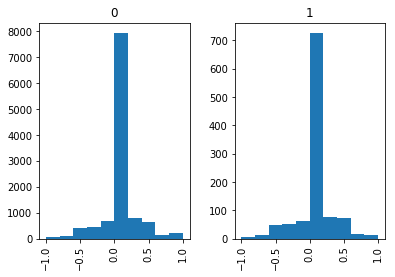

count      mean       std  min  25%  50%       75%  max
Viral                                                           
0      11361.0  0.041910  0.250543 -1.0  0.0  0.0  0.033333  1.0
1       1083.0  0.035971  0.258805 -1.0  0.0  0.0  0.033333  1.0

In [25]:
df.hist(by='Viral',column = 'title_sentiment')
plt.show()
df.groupby('Viral')['title_sentiment'].describe()

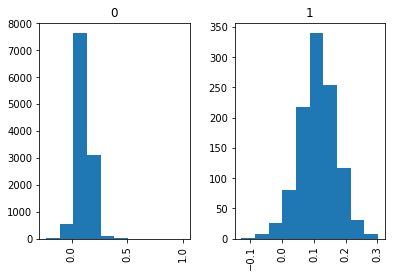

count      mean       std       min       25%       50%       75%  \
Viral                                                                        
0      11361.0  0.108728  0.058630 -0.231195  0.071713  0.106901  0.143621   
1       1083.0  0.113164  0.057657 -0.128359  0.078146  0.114043  0.149332   

            max  
Viral            
0      1.000000  
1      0.302023

In [26]:
df.hist(by='Viral',column = 'content_sentiment')
plt.show()
df.groupby('Viral')['content_sentiment'].describe()

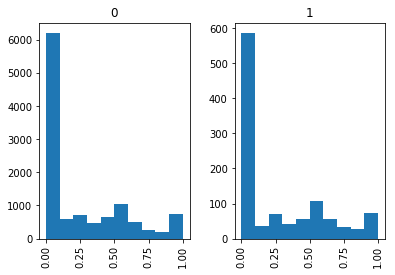

count      mean       std  min  25%  50%       75%  max
Viral                                                           
0      11361.0  0.234094  0.311558  0.0  0.0  0.0  0.454545  1.0
1       1083.0  0.250027  0.320949  0.0  0.0  0.0  0.500000  1.0

In [27]:
df.hist(by='Viral',column = 'title_sentiment_subjectivity')
plt.show()
df.groupby('Viral')['title_sentiment_subjectivity'].describe()

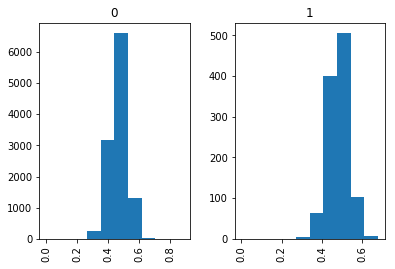

count      mean       std  min       25%       50%       75%  \
Viral                                                                   
0      11361.0  0.465931  0.054332  0.0  0.431854  0.466703  0.501195   
1       1083.0  0.480047  0.050402  0.0  0.450315  0.482517  0.509456   

            max  
Viral            
0      0.879630  
1      0.677495

In [28]:
df.hist(by='Viral',column = 'content_sentiment_subjectivity')
plt.show()
df.groupby('Viral')['content_sentiment_subjectivity'].describe()

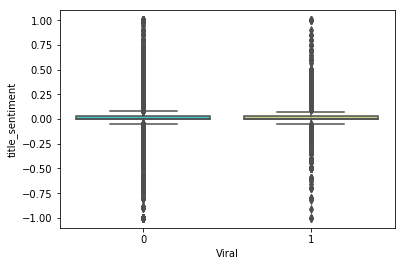

In [29]:
sns.boxplot(x='Viral',y='title_sentiment',data=df,palette='rainbow')


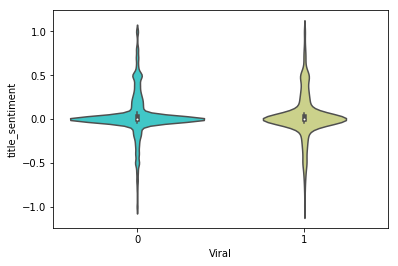

In [30]:
sns.violinplot(x='Viral',y='title_sentiment',data=df,palette='rainbow')

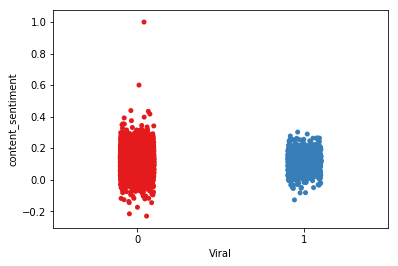

In [31]:
sns.stripplot(x='Viral',y='content_sentiment',data=df,jitter=True,palette='Set1')

Similar ideas and similar words occured in both; signifying there's no much difference between the two

# Analysis for Virality of an Article

In [33]:
import seaborn.apionly as sns

In [34]:
print(df.columns)

Index(['index', 'category', 'title', 'author', 'date', 'read_time', 'shares',
       'Viral', 'content', 'Unprocessed_text', 'Concepts_count', 'imageCount',
       'Day', 'count_title', 'count_content', 'title_sentiment',
       'title_sentiment_subjectivity', 'content_sentiment',
       'content_sentiment_subjectivity'],
      dtype='object')


Content Word Count

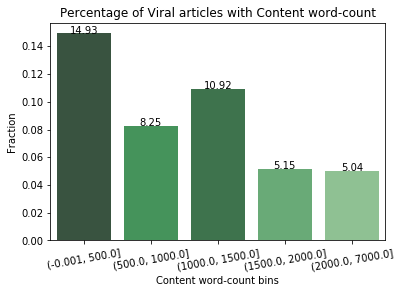

In [35]:
#print(df[df['Viral']==1]['count_content'].max())
#print(df[df['Viral']==1]['count_content'].min())
bins = [0, 500, 1000 , 1500, 2000, 7000]
df['binned'] = pd.cut(df['count_content'], bins, include_lowest=True)
s = pd.cut(df['count_content'], bins=bins,include_lowest=True ).value_counts()
x=pd.crosstab(df.Viral, df.binned).apply(lambda r: r/r.sum(), axis=0)
content = x.stack().reset_index().rename(columns={0:'value'})
content1 = content[content['Viral']==1].reset_index()

pal1 = sns.color_palette("Greens_d", len(content1))
rank = content1["value"].argsort().argsort() 
g = sns.barplot(x = 'binned', y='value', data = content1,palette=np.array(pal1[::-1])[rank] )
g.set(xlabel = 'Content word-count bins', ylabel = 'Fraction', title= 'Percentage of Viral articles with Content word-count')
for item in g.get_xticklabels():
    item.set_rotation(10)
for index, row in content1.iterrows():
    g.text(row.name,row.value, round(row.value*100,2), color='black', ha="center")

Title Word Count

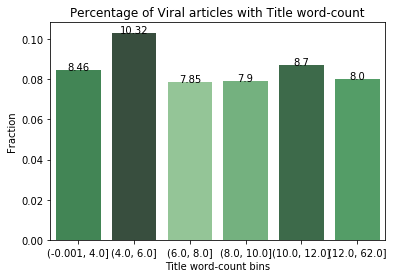

In [36]:
#print(df[df['Viral']==1]['count_title'].max())
#print(df[df['Viral']==1]['count_title'].min())
bins = [0,4,6,8,10,12,62]
df['binned_title_count'] = pd.cut(df['count_title'], bins, include_lowest=True)
s = pd.cut(df['count_title'], bins=bins,include_lowest=True ).value_counts()
x=pd.crosstab(df.Viral, df.binned_title_count).apply(lambda r: r/r.sum(), axis=0)
content = x.stack().reset_index().rename(columns={0:'value'})
content1 = content[content['Viral']==1].reset_index()
pal1 = sns.color_palette("Greens_d", len(content1))
rank = content1["value"].argsort().argsort() 
g = sns.barplot(x = 'binned_title_count', y='value', data = content1,palette=np.array(pal1[::-1])[rank] )
g.set(xlabel = 'Title word-count bins', ylabel = 'Fraction', title= 'Percentage of Viral articles with Title word-count')
#for item in g.get_xticklabels():
  #  item.set_rotation(10)
for index, row in content1.iterrows():
    g.text(row.name,row.value, round(row.value*100,2), color='black', ha="center")

Read Time

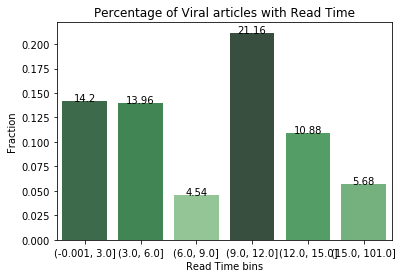

In [37]:
#print(df[df['Viral']==1]['read_time'].max())
#print(df[df['Viral']==1]['read_time'].min())
bins_readtime = [0,3,6,9,12,15,101]
df['binned_readTime'] = pd.cut(df['read_time'], bins_readtime, include_lowest=True)
s = pd.cut(df['read_time'], bins=bins_readtime,include_lowest=True ).value_counts()
x=pd.crosstab(df.Viral, df.binned_readTime).apply(lambda r: r/r.sum(), axis=0)
content = x.stack().reset_index().rename(columns={0:'value'})
content1 = content[content['Viral']==1].reset_index()
pal1 = sns.color_palette("Greens_d", len(content1))
rank = content1["value"].argsort().argsort() 
g = sns.barplot(x = 'binned_readTime', y='value', data = content1,palette=np.array(pal1[::-1])[rank] )
g.set(xlabel = 'Read Time bins', ylabel = 'Fraction', title= 'Percentage of Viral articles with Read Time')
#for item in g.get_xticklabels():
  #  item.set_rotation(10)
for index, row in content1.iterrows():
    g.text(row.name,row.value, round(row.value*100,2), color='black', ha="center")

Title Polarity

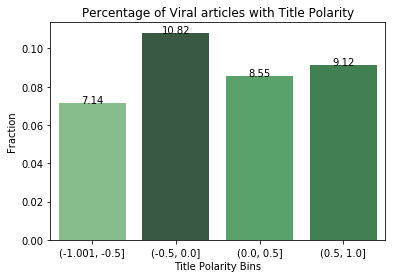

In [38]:
bins_titleSentiment =  [-1,-0.5, 0,0.5, 1]
df['binned_titleSentiment'] = pd.cut(df['title_sentiment'], bins_titleSentiment, include_lowest=True)
s = pd.cut(df['title_sentiment'], bins=bins_titleSentiment,include_lowest=True ).value_counts()
x=pd.crosstab(df.Viral, df.binned_titleSentiment).apply(lambda r: r/r.sum(), axis=0)
content = x.stack().reset_index().rename(columns={0:'value'})
content1 = content[content['Viral']==1].reset_index()
pal1 = sns.color_palette("Greens_d", len(content1))
rank = content1["value"].argsort().argsort() 
g = sns.barplot(x = 'binned_titleSentiment', y='value', data = content1,palette=np.array(pal1[::-1])[rank] )
g.set(xlabel = 'Title Polarity Bins', ylabel = 'Fraction', title= 'Percentage of Viral articles with Title Polarity')
#for item in g.get_xticklabels():
  #  item.set_rotation(10)
for index, row in content1.iterrows():
    g.text(row.name,row.value, round(row.value*100,2), color='black', ha="center")

Title Subjectivity

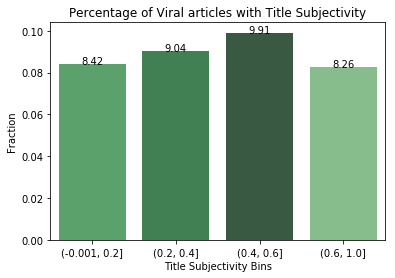

In [39]:
bins_titleSentiment =  [0,0.2,0.4,0.6,1]
df['binned_titleSubjecivity'] = pd.cut(df['title_sentiment_subjectivity'], bins_titleSentiment, include_lowest=True)
s = pd.cut(df['title_sentiment'], bins=bins_titleSentiment,include_lowest=True ).value_counts()
x=pd.crosstab(df.Viral, df.binned_titleSubjecivity).apply(lambda r: r/r.sum(), axis=0)
content = x.stack().reset_index().rename(columns={0:'value'})
content1 = content[content['Viral']==1].reset_index()
pal1 = sns.color_palette("Greens_d", len(content1))
rank = content1["value"].argsort().argsort() 
g = sns.barplot(x = 'binned_titleSubjecivity', y='value', data = content1,palette=np.array(pal1[::-1])[rank] )
g.set(xlabel = 'Title Subjectivity Bins', ylabel = 'Fraction', title= 'Percentage of Viral articles with Title Subjectivity')
#for item in g.get_xticklabels():
  #  item.set_rotation(10)
for index, row in content1.iterrows():
    g.text(row.name,row.value, round(row.value*100,2), color='black', ha="center")

Cotent Polarity

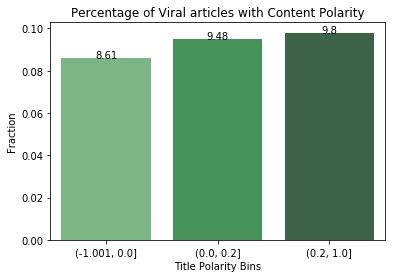

In [40]:
bins_contentSentiment =  [-1, 0,0.2, 1]
df['binned_contentSentiment'] = pd.cut(df['content_sentiment'], bins_contentSentiment, include_lowest=True)
s = pd.cut(df['content_sentiment'], bins=bins_contentSentiment,include_lowest=True ).value_counts()
x=pd.crosstab(df.Viral, df.binned_contentSentiment).apply(lambda r: r/r.sum(), axis=0)
content = x.stack().reset_index().rename(columns={0:'value'})
content1 = content[content['Viral']==1].reset_index()
pal1 = sns.color_palette("Greens_d", len(content1))
rank = content1["value"].argsort().argsort() 
g = sns.barplot(x = 'binned_contentSentiment', y='value', data = content1,palette=np.array(pal1[::-1])[rank] )
g.set(xlabel = 'Title Polarity Bins', ylabel = 'Fraction', title= 'Percentage of Viral articles with Content Polarity')
#for item in g.get_xticklabels():
  #  item.set_rotation(10)
for index, row in content1.iterrows():
    g.text(row.name,row.value, round(row.value*100,2), color='black', ha="center")

Content Subjectivity

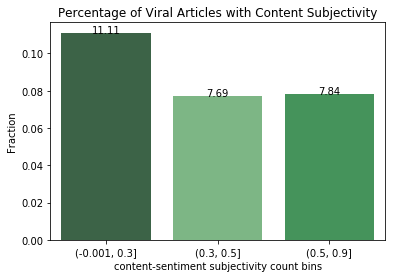

In [41]:
bins_contentSubjectivity = [0,0.3,0.5,0.9]
df['binned_contentSubjecivity'] = pd.cut(df['content_sentiment_subjectivity'], bins_contentSubjectivity, include_lowest=True)
s_contentSubjectivity = pd.cut(df['content_sentiment_subjectivity'], bins=bins_contentSubjectivity,include_lowest=True).value_counts()
x_contentSubjectivity = pd.crosstab(df.Viral, df.binned_contentSubjecivity).apply(lambda r: r/r.sum(), axis=0)
contentSubj = x_contentSubjectivity.stack().reset_index().rename(columns={0:'value'})
contentSubj1 = contentSubj[contentSubj['Viral']==1].reset_index()

pal = sns.color_palette("Greens_d", len(contentSubj1))
rank = contentSubj1["value"].argsort().argsort() 
g=sns.barplot(x='binned_contentSubjecivity',y='value',data=contentSubj1, palette=np.array(pal[::-1])[rank])
g.set(xlabel = 'content-sentiment subjectivity count bins', ylabel = 'Fraction', title='Percentage of Viral Articles with Content Subjectivity')
for index, row in contentSubj1.iterrows():
    g.text(row.name,row.value, round(row.value*100,2), color='black', ha="center")

Image Count

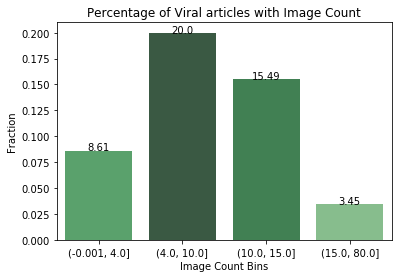

In [42]:
bins_imageCount =  [0,4,10,15,80]
df['binned_imageCount'] = pd.cut(df['imageCount'], bins_imageCount, include_lowest=True)
s = pd.cut(df['imageCount'], bins=bins_imageCount,include_lowest=True ).value_counts()
x=pd.crosstab(df.Viral, df.binned_imageCount).apply(lambda r: r/r.sum(), axis=0)
content = x.stack().reset_index().rename(columns={0:'value'})
content1 = content[content['Viral']==1].reset_index()
pal1 = sns.color_palette("Greens_d", len(content1))
rank = content1["value"].argsort().argsort() 
g = sns.barplot(x = 'binned_imageCount', y='value', data = content1,palette=np.array(pal1[::-1])[rank] )
g.set(xlabel = 'Image Count Bins', ylabel = 'Fraction', title= 'Percentage of Viral articles with Image Count')
#for item in g.get_xticklabels():
  #  item.set_rotation(10)
for index, row in content1.iterrows():
    g.text(row.name,row.value, round(row.value*100,2), color='black', ha="center")

With Concepts

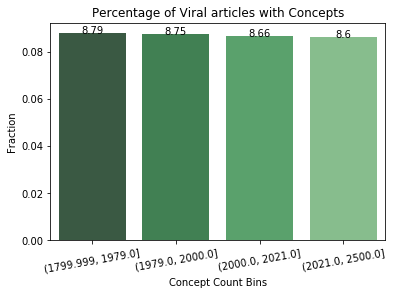

In [43]:
bins_concepts =  [1800,1979,2000,2021, 2500]
df['binned_concepts'] = pd.cut(df['Concepts_count'], bins_concepts, include_lowest=True)
s = pd.cut(df['imageCount'], bins=bins_concepts,include_lowest=True ).value_counts()
x=pd.crosstab(df.Viral, df.binned_concepts).apply(lambda r: r/r.sum(), axis=0)
content = x.stack().reset_index().rename(columns={0:'value'})
content1 = content[content['Viral']==1].reset_index()
pal1 = sns.color_palette("Greens_d", len(content1))
rank = content1["value"].argsort().argsort() 
g = sns.barplot(x = 'binned_concepts', y='value', data = content1,palette=np.array(pal1[::-1])[rank] )
g.set(xlabel = 'Concept Count Bins', ylabel = 'Fraction', title= 'Percentage of Viral articles with Concepts')
for item in g.get_xticklabels():
    item.set_rotation(10)
for index, row in content1.iterrows():
    g.text(row.name,row.value, round(row.value*100,2), color='black', ha="center")

Significance with date of week

   index  Viral          Day     value
0      7      1     1 Sunday  0.099631
1      8      1     2 Monday  0.085923
2      9      1    3 Tuesday  0.089505
3     10      1  4 Wednesday  0.084192
4     11      1   5 Thursday  0.086017
5     12      1     6 Friday  0.079350
6     13      1   7 Saturday  0.095349


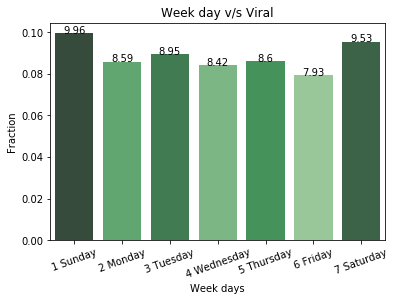

In [44]:
x_dayCount = pd.crosstab(df.Viral, df.Day).apply(lambda r: r/r.sum(), axis=0)
day = x_dayCount.stack().reset_index().rename(columns={0:'value'})
day1 = day[day['Viral']==1].reset_index()
print(day1)

pal1 = sns.color_palette("Greens_d", len(day1))
rank = day1["value"].argsort().argsort() 

g = sns.barplot(x = day1.Day, y=day1.value, data = day1,palette=np.array(pal1[::-1])[rank] )
g.set(xlabel = 'Week days', ylabel = 'Fraction', title = 'Week day v/s Viral')

for item in g.get_xticklabels():
    item.set_rotation(20)
for index, row in day1.iterrows():
    g.text(row.name,row.value, round(row.value*100,2), color='black', ha="center")